# Lending Club Loan- Defaulters Prediction-LogisticR 

## Business Problem:

- **To determine if a credit line should be extended to a business**, given a set of attributes for an MSME/ Individual. If so, **what should the repayment terms** be in business recommendations?

## Column Profiling:

- loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- term : The number of payments on the loan. Values are in months and can be either 36 or 60.
- int_rate : Interest Rate on the loan
- installment : The monthly payment owed by the borrower if the loan originates.
- grade : assigned loan grade
- sub_grade : assigned loan subgrade
- emp_title :The job title supplied by the Borrower when applying for the loan.*
- emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
- home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
- annual_inc : The self-reported annual income provided by the borrower during registration.
- verification_status : Indicates if income was verified by , not verified, or if the income source was verified
- issue_d : The month which the loan was funded
- loan_status : Current status of the loan - Target Variable
- purpose : A category provided by the borrower for the loan request.
- title : The loan title provided by the borrower
- dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested loan, divided by the borrower’s self-reported monthly income.
- earliest_cr_line :The month the borrower's earliest reported credit line was opened
- revol_bal : Total credit revolving balance
- revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- initial_list_status : The initial listing status of the loan. Possible values are – W, F
- application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
- mort_acc : Number of mortgage accounts.
- pub_rec_bankruptcies : Number of public record Lending Clubs/Banksruptcies
- pub_rec : Number of derogatory public records
- open_acc : The number of open credit lines in the borrower's credit file.
- total_acc : The total number of credit lines currently in the borrower's credit file
- Address- Address of the borrower


# Exploratory data analysis:


### Importing required packages:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
from numpy import NaN, nan, NAN
from scipy import stats
import statsmodels.api as sm

# For pipeline creation
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

# FOr imputation to NAN values.
from sklearn.impute import SimpleImputer


### Loading data into Dataframe:

In [2]:
loan_data=pd.read_csv("logistic_regression.txt")

In [3]:
loan_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


### Identification of variables and data types:

In [4]:
loan_data.shape

(396030, 27)

In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
def feature_names():
    print(f"Columns with category datatypes (Categorical Features) are : \n {list(loan_data.select_dtypes('object').columns)}")
    print('-'*100)
    print('-'*100)
    print(f"Columns with integer and float datatypes (Numerical Features) are : \n {list(loan_data.select_dtypes(['int64','float64']).columns)}")
  

In [7]:
feature_names()

Columns with category datatypes (Categorical Features) are : 
 ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Columns with integer and float datatypes (Numerical Features) are : 
 ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']


### Analysing the basic metrics:

In [8]:
loan_data.describe(include=[np.number]).transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [9]:
loan_data.describe(include=[object]).transpose()

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


## Missing values and Outlier Treatment:

In [10]:
# Missing values:

def missingvalue(df):
    # Identifying Missing data.
    total_null = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/len(df))*100).sort_values(ascending = False)
    print(f"Total records in our data = {df.shape[0]} where missing values are as follows:")
    
    missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
    return missing_data

In [11]:
missing_df = missingvalue(loan_data)
missing_df[missing_df['Total Missing']>0]

Total records in our data = 396030 where missing values are as follows:


,Total Missing,In Percent
mort_acc,37795,9.54
emp_title,22927,5.79
emp_length,18301,4.62
title,1755,0.44
pub_rec_bankruptcies,535,0.14
revol_util,276,0.07


### Observations: 

- 3 numerical features and 3 categorical features are having missing values.


### Dealing with emp_title:

In [12]:
top_10 = loan_data['emp_title'].value_counts().head(10)
top_10

Teacher             4389
Manager             4250
Registered Nurse    1856
RN                  1846
Supervisor          1830
Sales               1638
Project Manager     1505
Owner               1410
Driver              1339
Office Manager      1218
Name: emp_title, dtype: int64

In [13]:
top_10_df = pd.DataFrame({'frequency':top_10})
top10_dfnewest = top_10_df.reset_index()
top10_dflatest = top10_dfnewest.rename(columns = {'index':'emp_title'})
top10_dflatest

,emp_title,frequency
0,Teacher,4389
1,Manager,4250
2,Registered Nurse,1856
3,RN,1846
4,Supervisor,1830
5,Sales,1638
6,Project Manager,1505
7,Owner,1410
8,Driver,1339
9,Office Manager,1218


In [14]:
df_latest=pd.merge(top10_dflatest,loan_data, how = 'inner', on ='emp_title')
df_latest.head()

,emp_title,frequency,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,Teacher,4389,15000.0,36 months,9.99,483.94,B,B1,10+ years,MORTGAGE,...,13.0,0.0,13658.0,56.7,25.0,f,INDIVIDUAL,2.0,0.0,"10747 Jennifer Lights\r\nEast Graceburgh, NC 0..."
1,Teacher,4389,35000.0,36 months,14.65,1207.30,C,C5,10+ years,MORTGAGE,...,10.0,0.0,15437.0,42.1,25.0,w,INDIVIDUAL,3.0,0.0,50540 Joshua Islands Suite 375\r\nRandallville...
2,Teacher,4389,28625.0,36 months,11.99,950.63,B,B3,10+ years,MORTGAGE,...,11.0,0.0,19021.0,47.6,25.0,w,INDIVIDUAL,6.0,0.0,"2090 Higgins Lane Suite 171\r\nCannonbury, OK ..."
3,Teacher,4389,11000.0,36 months,11.44,362.43,B,B4,10+ years,RENT,...,8.0,1.0,9814.0,73.0,38.0,f,INDIVIDUAL,1.0,1.0,"262 Heath Hill\r\nWest Brittany, WI 30723"
4,Teacher,4389,2000.0,36 months,14.98,69.32,C,C3,5 years,RENT,...,13.0,0.0,26528.0,56.7,17.0,f,INDIVIDUAL,0.0,0.0,"PSC 9860, Box 1451\r\nAPO AA 48052"


In [15]:
top10_dflatest = df_latest[df_latest['loan_status']=='Fully Paid']
top10_dflatest.head()

,emp_title,frequency,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,Teacher,4389,15000.0,36 months,9.99,483.94,B,B1,10+ years,MORTGAGE,...,13.0,0.0,13658.0,56.7,25.0,f,INDIVIDUAL,2.0,0.0,"10747 Jennifer Lights\r\nEast Graceburgh, NC 0..."
1,Teacher,4389,35000.0,36 months,14.65,1207.30,C,C5,10+ years,MORTGAGE,...,10.0,0.0,15437.0,42.1,25.0,w,INDIVIDUAL,3.0,0.0,50540 Joshua Islands Suite 375\r\nRandallville...
2,Teacher,4389,28625.0,36 months,11.99,950.63,B,B3,10+ years,MORTGAGE,...,11.0,0.0,19021.0,47.6,25.0,w,INDIVIDUAL,6.0,0.0,"2090 Higgins Lane Suite 171\r\nCannonbury, OK ..."
3,Teacher,4389,11000.0,36 months,11.44,362.43,B,B4,10+ years,RENT,...,8.0,1.0,9814.0,73.0,38.0,f,INDIVIDUAL,1.0,1.0,"262 Heath Hill\r\nWest Brittany, WI 30723"
4,Teacher,4389,2000.0,36 months,14.98,69.32,C,C3,5 years,RENT,...,13.0,0.0,26528.0,56.7,17.0,f,INDIVIDUAL,0.0,0.0,"PSC 9860, Box 1451\r\nAPO AA 48052"


In [16]:
top10_dflatest=top10_dflatest['emp_title'].value_counts()
top10_dflatest

Teacher             3532
Manager             3321
Registered Nurse    1476
RN                  1467
Supervisor          1425
Project Manager     1259
Sales               1239
Office Manager       970
Driver               961
Owner                954
Name: emp_title, dtype: int64

In [17]:
top_10_df = pd.DataFrame({'Frequency of afforded job titles' : top10_dflatest})
top10_dfnewest= top_10_df.reset_index()
top10_dflatest=top10_dfnewest.rename(columns = {'index' : 'Job roles for fully paid'})
top10_dflatest

,Job roles for fully paid,Frequency of afforded job titles
0,Teacher,3532
1,Manager,3321
2,Registered Nurse,1476
3,RN,1467
4,Supervisor,1425
5,Project Manager,1259
6,Sales,1239
7,Office Manager,970
8,Driver,961
9,Owner,954


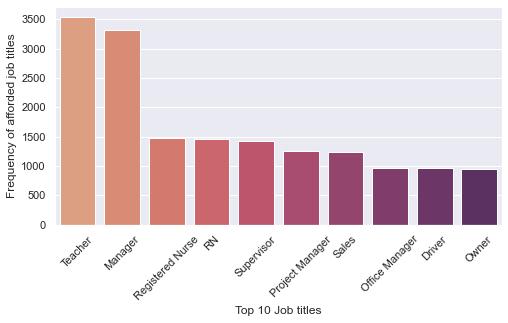

In [18]:
plt.figure(figsize=(8,4))
sns.set_theme(style='darkgrid')
sns.barplot(data=top10_dflatest,x='Job roles for fully paid', y = 'Frequency of afforded job titles', palette = 'flare')
plt.xticks(rotation=45)
plt.xlabel('Top 10 Job titles')
plt.show()

In [19]:
# dropping emp_title for model as almost half are unique values
loan_data = loan_data.drop('emp_title',axis=1)

### Inference:

- Name the top 2 afforded job titles - Teacher and Manager
- The feature **emp_title** will not be informative because half people (173k) have unique titles, so we have dropped it.

### Dealing with emp_length:

In [20]:
emp_len_sorted=sorted(loan_data['emp_length'].dropna().unique())
emp_len_sorted

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

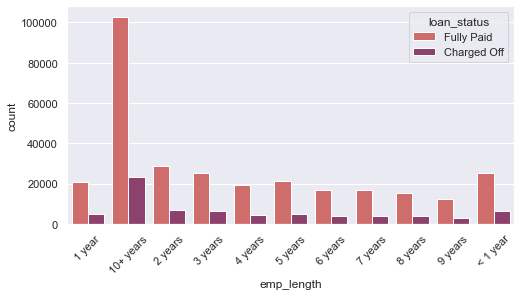

In [21]:
plt.figure(figsize=(8,4))
sns.countplot(x='emp_length',data=loan_data,order = emp_len_sorted,hue='loan_status', palette='flare')
plt.xticks(rotation=45)
plt.show()

In [22]:
emp_co=loan_data[loan_data['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_fp=loan_data[loan_data['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']
emp_len=emp_co/(emp_co+emp_fp)*100
pd.DataFrame(emp_len.round())

,loan_status
emp_length,
1 year,20.0
10+ years,18.0
2 years,19.0
3 years,20.0
4 years,19.0
5 years,19.0
6 years,19.0
7 years,19.0
8 years,20.0


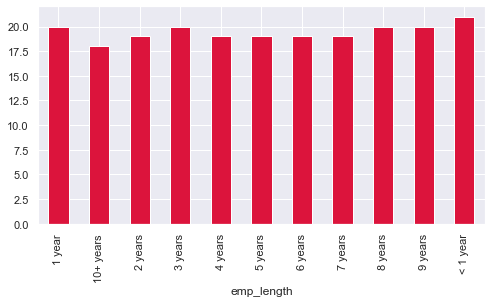

In [23]:
plt.figure(figsize=(8,4))
emp_len.round().plot(kind='bar',color='crimson')
plt.xticks(rotation=90)
plt.show()

In [24]:
# drop emp_length
loan_data=loan_data.drop('emp_length',axis=1)

### Inference:
- Customers's majoritly working for 10+ years.
- This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan.
- Charge off rates are extremely similar across all employment lengths.
- If the ratio between the two bars is the same across all categories, then this feature will not be very informative and we can safely drop it

### Dealing with title:

In [25]:
loan_data['title'].value_counts().head(10)

Debt consolidation         152472
Credit card refinancing     51487
Home improvement            15264
Other                       12930
Debt Consolidation          11608
Major purchase               4769
Consolidation                3852
debt consolidation           3547
Business                     2949
Debt Consolidation Loan      2864
Name: title, dtype: int64

In [26]:
loan_data['title'].value_counts().nunique()

209

In [27]:
print(loan_data['title'].head(10))
print('-'*30)
print('-'*30)
print(loan_data['purpose'].head(10))

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object
------------------------------
------------------------------
0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object


In [28]:
# dropping title as it's showing similar details as purpose
loan_data=loan_data.drop('title',axis=1)

### Creating Copy:

In [29]:
# Imputing mort_acc with median
#loan_data['mort_acc'].fillna(loan_data['mort_acc'].median(),inplace=True)

In [30]:
loan_data_copy1=loan_data.copy()

As we need to do median imputation after the train test split, on train data we won't be able to perform median imputation on overall data.

### Dealing with revol_util and the pub_rec_bankruptcies:

In [31]:
# For the other two, just dropping the NAN columns as the data is less than 0.2%

loan_data=loan_data.dropna(axis=0,how='any',subset=['revol_util','pub_rec_bankruptcies'])

In [32]:
loan_data.shape

(395219, 24)

In [33]:
loan_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address'],
      dtype='object')

### Inference:
- revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.2% of the total data. Hence we will remove the rows that are missing those values in those columns with dropna().

In [34]:
# Cross checking
missingvalue(loan_data)

Total records in our data = 395219 where missing values are as follows:


,Total Missing,In Percent
mort_acc,37205,9.41
loan_amnt,0,0.00
term,0,0.00
pub_rec_bankruptcies,0,0.00
application_type,0,0.00
initial_list_status,0,0.00
total_acc,0,0.00
revol_util,0,0.00
revol_bal,0,0.00
pub_rec,0,0.00


In [35]:
# Checking percentage of Fully paid and defaulted customers

val_counts =loan_data['loan_status'].value_counts(normalize=True)*100
pd.DataFrame(val_counts.round())

,loan_status
Fully Paid,80.0
Charged Off,20.0


### Inferences:
- The data is clearly imbalanced. This is a typical scenario when dealing with problems related to loan default, spam or fraud detection. We can expect to do very well in terms of accuracy, but our precision and recall will be the true matrix that our model should be evaluated based on. We do not expect the model to perform very well on those metrics.

# Univariate Analysis:

In [36]:
def numerical_feat(df,colname,nrows=2,mcols=2,width=15,height=15):
    fig,ax=plt.subplots(nrows,mcols,figsize=(width,height))
    fig.set_facecolor("peachpuff")
    rows=0
    for var in colname:
        ax[rows][0].set_title("Boxplot for Outlier Detection ",fontweight="bold")
        plt.ylabel(var,fontsize=12)
        sns.boxplot(y=df[var],color='crimson',ax=ax[rows][0])
        
        # plt.subplot(nrows,mcols,pltcounter+1)
        sns.histplot(df[var],color='purple',ax=ax[rows][1])
        ax[rows][1].axvline(df[var].mean(),color='r',linestyle='--',label="Mean")
        ax[rows][1].axvline(df[var].median(),color='m',linestyle='-',label="Median")
        ax[rows][1].axvline(df[var].mode()[0],color='royalblue',linestyle='-',label="Mode")
        ax[rows][1].set_title("Outlier Detection",fontweight="bold")
        ax[rows][1].legend({'Mean':df[var].mean(),'Median':df[var].median(),'Mode':df[var].mode()})
        rows+=1
    plt.show()    
        
                              

In [37]:
feature_names()

Columns with category datatypes (Categorical Features) are : 
 ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Columns with integer and float datatypes (Numerical Features) are : 
 ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']


In [38]:
numerical_cols=['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'total_acc']

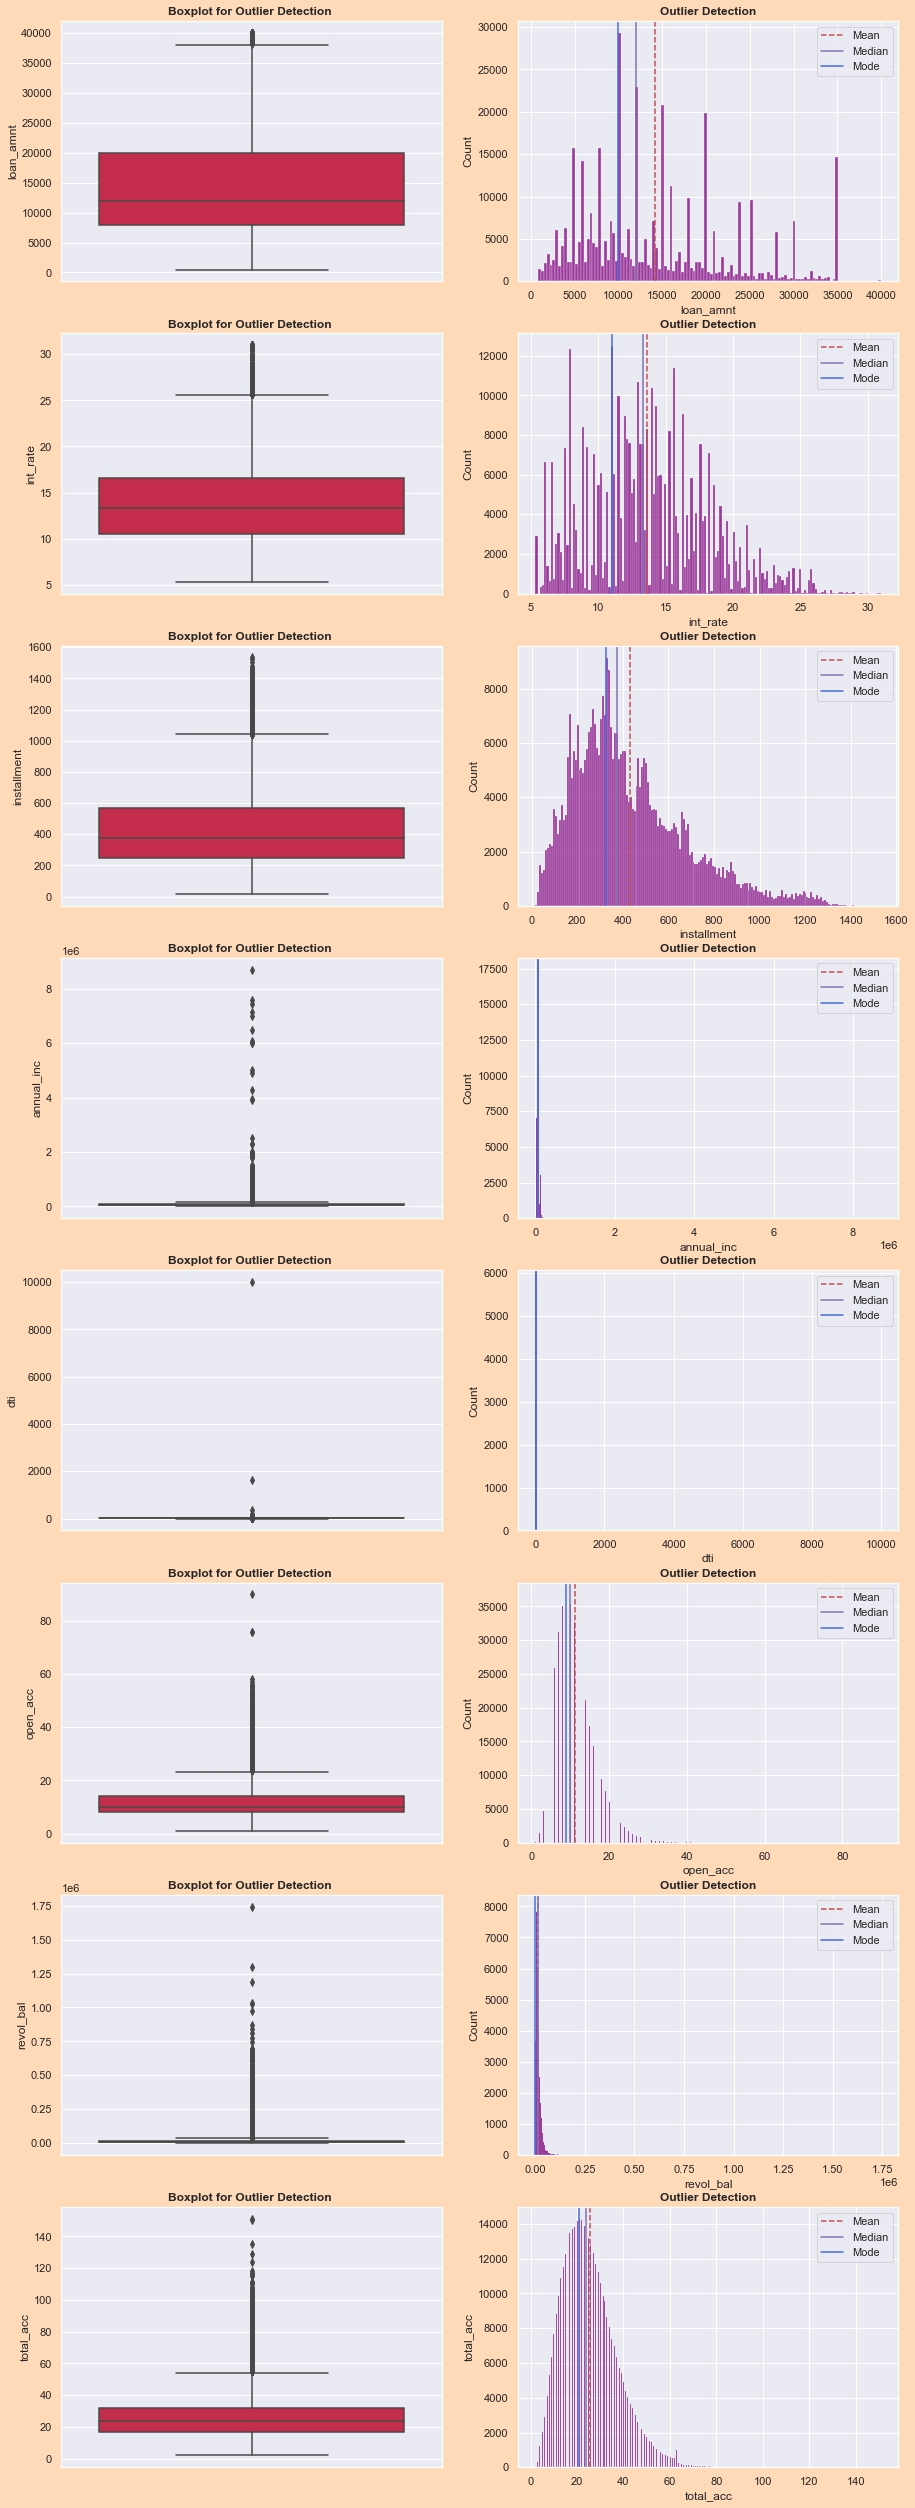

In [39]:
numerical_feat(loan_data,numerical_cols,len(numerical_cols),2,15,45)

In [40]:
loan_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address'],
      dtype='object')

### Inferences:
- Above plots can be interpreted as we have many outliers and hence we need to handle them post train - test split
- As outliers detection and treatment can be done after train-test spli, we won't fo the iqr based median imputation for outliers. We will treat after split.

# Outliers Detection and Treatment:

In [41]:
# Creating a copy of our original data and will use this copy for further processing.

loan_data_new=loan_data.copy()

In [42]:
loan_data.shape

(395219, 24)

In [43]:
q1=loan_data_new[numerical_cols].quantile(0.25)
q3=loan_data_new[numerical_cols].quantile(0.75)
iqr=q3-q1
loan_data_new=loan_data_new[~((loan_data_new[numerical_cols]<q1-1.5*iqr)
                             | (loan_data_new[numerical_cols]>q3+1.5*iqr)).any(axis=1)]
loan_data_new=loan_data_new.reset_index(drop=True)

In [44]:
loan_data.shape[0]-loan_data_new.shape[0]

54747

In [45]:
percentage_removal=(39931/396030)*100
percentage_removal

10.082822008433705

- If we remove outliers of the data using IQR, then around 10% data is getting removed. Hence we won't remove the outliers, we will treat it after **train-test split**

In [46]:
loan_data.select_dtypes('number').columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

# Feature Engineering:

### Creation of Flags-
If a value greater than 0.0 then 1 else 0.

- This is be done on:
    - Pub_rec
    - Mort_acc
    - pub_rec_bankruptcies

In [47]:
loan_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


### FE on pub_rec

In [48]:
loan_data['pub_rec'].value_counts()

0.0     337489
1.0      49713
2.0       5474
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0         1
Name: pub_rec, dtype: int64

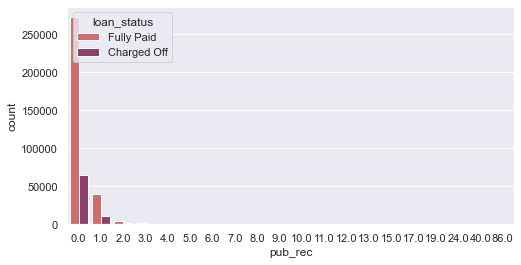

In [49]:
plt.figure(figsize=(8,4))
sns.countplot(x='pub_rec',data=loan_data,hue='loan_status',palette='flare')
plt.show()

In [50]:
loan_data['pub_rec']=loan_data['pub_rec'].apply(lambda x: 1 if x>0.0 else 0)

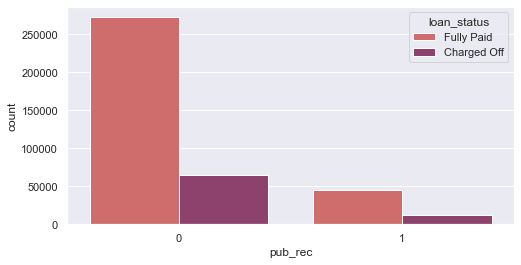

In [51]:
plt.figure(figsize=(8,4))
sns.countplot(x='pub_rec',data=loan_data,hue='loan_status',palette='flare')
plt.show()

### FE on pub_rec_bankruptcies

In [52]:
loan_data['pub_rec_bankruptcies'].value_counts()

0.0    350108
1.0     42786
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

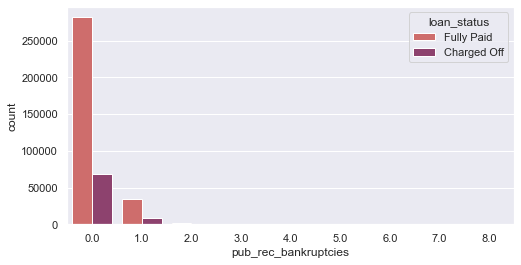

In [53]:
plt.figure(figsize=(8,4))
sns.countplot(x='pub_rec_bankruptcies',data=loan_data,hue='loan_status',palette='flare')
plt.show()

In [54]:
loan_data['pub_rec_bankruptcies']=loan_data['pub_rec_bankruptcies'].apply(lambda x:1 if x >0.0 else 0)

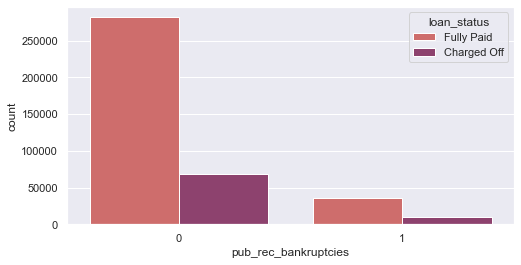

In [55]:
plt.figure(figsize=(8,4))
sns.countplot(x='pub_rec_bankruptcies',data=loan_data,hue='loan_status',palette='flare')
plt.show()

### FE on mort_acc will done post median imputation after train-test split.



In [56]:
loan_data['mort_acc'].value_counts()

0.0     139708
1.0      60384
2.0      49907
3.0      38022
4.0      27865
5.0      18182
6.0      11059
7.0       6050
8.0       3120
9.0       1653
10.0       863
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [57]:
# loan_data['mort_acc'] = loan_data['mort_acc'].apply(lambda x: 1 if x > 0.0 else 0)
# plt.figure(figsize = (8,4))
# sns.countplot(x = 'mort_acc', data = loan_data, hue = 'loan_status', palette = 'flare')
# plt.show()

In [58]:
# Convert_dtype = ['pub_rec','pub_rec_bankruptcies','mort_acc']
convert_dtype=['pub_rec','pub_rec_bankruptcies']
# Removing mort_acc as we have to impute missing values.

In [59]:
for i in convert_dtype:
    loan_data[i]=loan_data[i].astype('object')
print(loan_data[i].dtype)    

object


In [60]:
# Frequency of each feature in percentage.
def categorical_feat(df,colnames,nrows=2,mcols=2,width=15,height=80,sortbyindex=False):
    fig,ax=plt.subplots(nrows,mcols,figsize=(width,height))
    fig.set_facecolor(color='peachpuff')
    string="Frequency of "
    rows=0
    for colname in colnames:
        count=(df[colname].value_counts(normalize=True)*100)
        string+=colname + ' in (%)'
        if sortbyindex:
            count=count.sort_index()
        count.plot.bar(color=sns.color_palette("flare"),ax=ax[rows][0])
        ax[rows][0].set_ylabel(string,fontsize=14)
        ax[rows][0].set_xlabel(colname,fontsize=14)
        
        
        
        count.plot.pie(colors = sns.color_palette("flare"),autopct='%0.0f%%',
                       textprops={'fontsize': 14},shadow=True,ax=ax[rows][1])
        # explode=[0.2 if colname[i]== min(colname) else 0])
        
        ax[rows][0].set_title("Frequency wise " + colname,fontweight="bold")
        string="Frequency of "
        rows+=1
        

In [61]:
Cat_cols_all = ['term', 'grade', 'sub_grade',
                'home_ownership', 'verification_status', 'issue_d', 'loan_status',
                'purpose','earliest_cr_line', 'initial_list_status', 'application_type', 'address']

In [62]:
categorical_cols = ['grade', 'home_ownership', 'verification_status', 'loan_status', 'initial_list_status', 'application_type','pub_rec','pub_rec_bankruptcies','term']

In [63]:
features_with_large_unique_vals = ['sub_grade','issue_d', 'earliest_cr_line','address']

In [64]:
for i in Cat_cols_all:
    print(f" Unique values in {i} are {loan_data[i].nunique()}")

 Unique values in term are 2
 Unique values in grade are 7
 Unique values in sub_grade are 35
 Unique values in home_ownership are 6
 Unique values in verification_status are 3
 Unique values in issue_d are 112
 Unique values in loan_status are 2
 Unique values in purpose are 14
 Unique values in earliest_cr_line are 684
 Unique values in initial_list_status are 2
 Unique values in application_type are 3
 Unique values in address are 392898


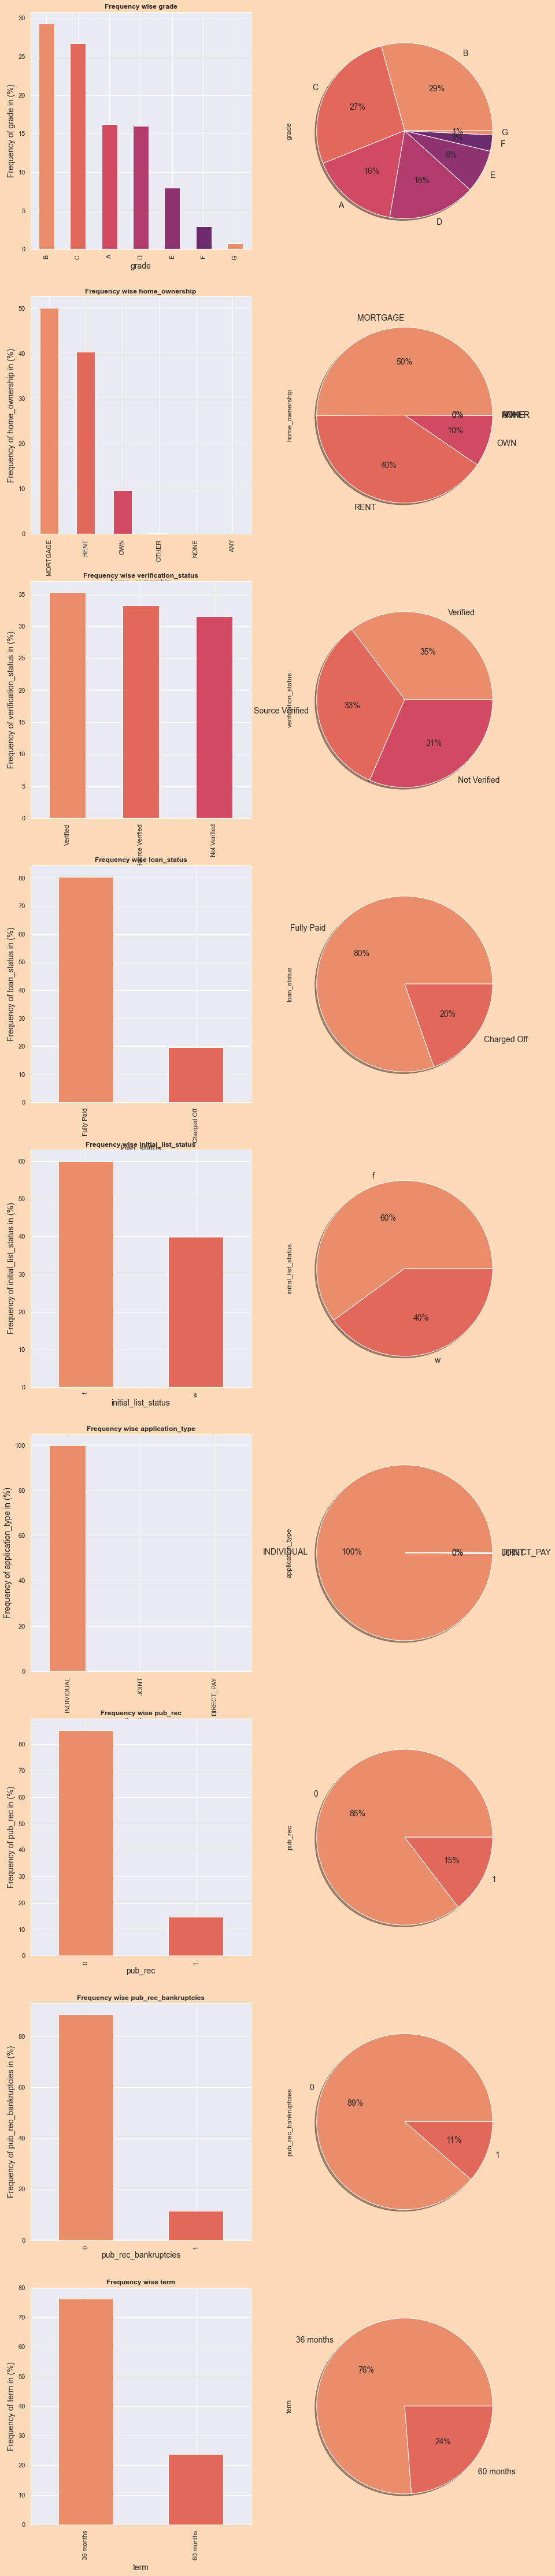

In [65]:
categorical_feat(loan_data,categorical_cols,len(categorical_cols),2)

In [66]:
for i,j in enumerate(categorical_cols):
    print(i,j)

0 grade
1 home_ownership
2 verification_status
3 loan_status
4 initial_list_status
5 application_type
6 pub_rec
7 pub_rec_bankruptcies
8 term


# Checking dependency of target variable (Loan_Status)

In [67]:
# Checking dependency of target variable (Loan_status) on various predictor variables

val_counts = loan_data['loan_status'].value_counts(normalize=True)*100
pd.DataFrame(val_counts.round())

,loan_status
Fully Paid,80.0
Charged Off,20.0


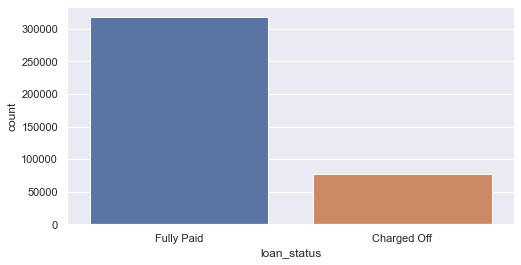

In [68]:
plt.figure(figsize=(8,4))
sns.countplot(data=loan_data,x='loan_status')
plt.show()

In [69]:
categorical_cols = ['term', 'grade', 'home_ownership', 'verification_status', 'loan_status', 'initial_list_status', 'application_type','purpose']

In [70]:
encode_dict={'Charged Off':1,'Fully Paid':0}
loan_data['loan_status']=loan_data['loan_status'].map(encode_dict)

In [71]:
loan_data['loan_status'].value_counts(normalize=True)*100
pd.DataFrame(val_counts.round())

,loan_status
Fully Paid,80.0
Charged Off,20.0


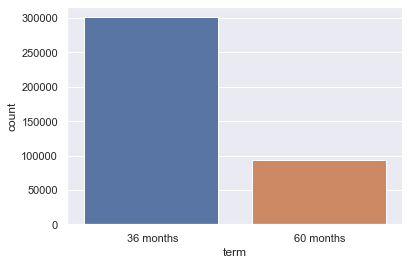

In [72]:
sns.countplot(data=loan_data,x='term')
plt.show()

In [73]:
encode_dict={' 36 months':0, ' 60 months':1}
loan_data['term']=loan_data['term'].map(encode_dict)

In [74]:
val_counts=loan_data['term'].value_counts(normalize=True)*100
pd.DataFrame(val_counts.round())

,term
0,76.0
1,24.0


In [75]:
loan_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [76]:
loan_data.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,0,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,16.0,0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,0,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,17.0,0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,0,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,13.0,0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"


<ipython-input-77-412427086e8e>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), ha ="right", fontsize=12, weight='bold')
<ipython-input-77-412427086e8e>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=12, weight='bold')


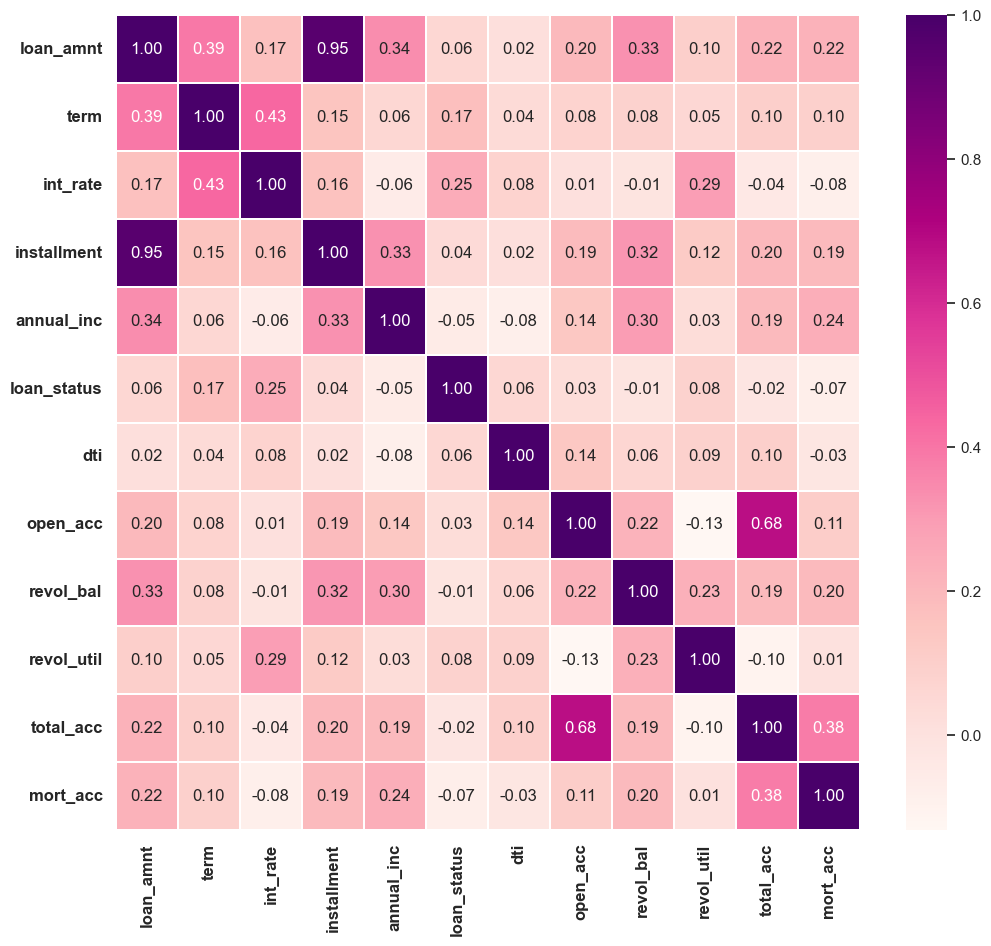

In [77]:
# Checking correlation among independent variables and how they interact with each other.

fig,ax=plt.subplots(figsize=(12,10),dpi=100)
fig.subplots_adjust(top=.94)

ax.set_yticklabels(ax.get_yticklabels(), ha ="right", fontsize=12, weight='bold')
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12, weight='bold')

sns.heatmap(loan_data.corr(),annot = True, fmt='.2f', linewidths=.3, ax=ax, cmap='RdPu')
plt.show()

### Inferences:
- loan_amnt and installment are highly correlated which means , more the number of loan amount, more are the installments.
- total_acc and open_acc are highly corelated.
- pub_rec_bankruptcies and pub_rec are higly corelated.

# EDA w.r.t loan_amnt, loan_installment , annual_inc and loan_status

In [78]:
loan_data.groupby(['loan_status'])['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,317696.0,13875.478681,8302.172723,500.0,7500.0,12000.0,19275.0,40000.0
1,77523.0,15132.578074,8503.989092,1000.0,8575.0,14000.0,20000.0,40000.0


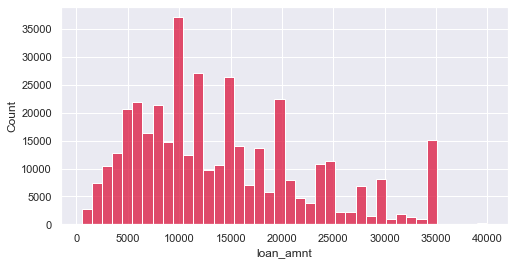

In [79]:
plt.figure(figsize=(8,4))
sns.histplot(data=loan_data,x='loan_amnt',bins=40,color='crimson')
plt.show()

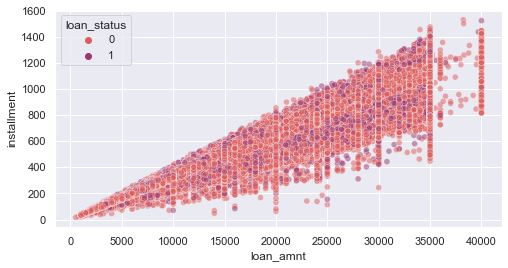

In [80]:
# relationship between loan amount, installment and loan_status

encode_dict = {'Charged Off':1, 'Fully Paid':0}
plt.figure(figsize=(8,4))
sns.scatterplot(data=loan_data, x='loan_amnt', y='installment',alpha=0.5,hue='loan_status',palette='flare')
plt.show()

### Inference:

- loan_amnt and installment are highly correlated which means , more the number of loan amount, more are the installments.

In [81]:
bins=[0,10000,20000,30000,40000]
group_name=['Very Low Loan','Lower Loan','Average Loan','High Loan']
loan_data['Loan_bin']=pd.cut(loan_data['loan_amnt'],bins=bins,labels=group_name)
loan_data['Loan_bin']

0         Very Low Loan
1         Very Low Loan
2            Lower Loan
3         Very Low Loan
4          Average Loan
              ...      
396025    Very Low Loan
396026     Average Loan
396027    Very Low Loan
396028     Average Loan
396029    Very Low Loan
Name: Loan_bin, Length: 395219, dtype: category
Categories (4, object): ['Very Low Loan' < 'Lower Loan' < 'Average Loan' < 'High Loan']

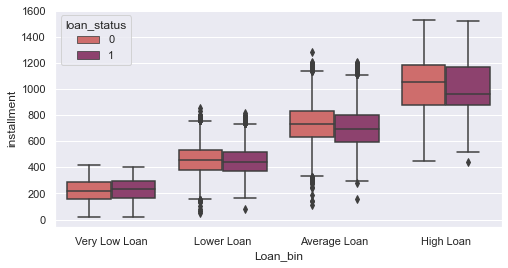

In [82]:
# relationship between loan amount, installment and loan_status

encode_dict = {'Charged Off':1, 'Fully Paid':0}
plt.figure(figsize=(8,4))
sns.boxplot(data=loan_data,x='Loan_bin',y='installment',hue='loan_status',palette='flare')
plt.show()

### Inference:

- When the loan taken is less than 20000, then the installments in form of the monthly payment owed by the borrower if the loan originates, are similar to both types of borrowers who have defaulted and who had fully paaid the loan.

- But as loan amount increases, the installments owed by the defaulters decreases as compared to the installments by the honest borrowers who are not defaulting.

In [83]:
# annual_inc

loan_data['annual_inc'].value_counts()

60000.00    15288
50000.00    13282
65000.00    11317
70000.00    10662
40000.00    10612
            ...  
67842.00        1
72179.00        1
50416.00        1
46820.80        1
31789.88        1
Name: annual_inc, Length: 27155, dtype: int64

In [84]:
loan_data.groupby(['loan_status'])['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,317696.0,75827.575913,62215.381438,600.0,46171.25,65000.0,90000.0,7600000.0
1,77523.0,67526.852852,58310.628403,0.0,42000.00,59000.0,80000.0,8706582.0


In [85]:
bins=[0,25000, 50000, 100000, 500000, 1200000, 2500000, 8706582]
group_name=['BPL', 'Very Low', 'Low', 'Average', 'Better off', 'High', 'Very High']
loan_data['Income_bin']=pd.cut(loan_data['annual_inc'],bins=bins,labels=group_name)
loan_data['Income_bin']

0          Average
1              Low
2         Very Low
3              Low
4              Low
            ...   
396025    Very Low
396026     Average
396027         Low
396028         Low
396029    Very Low
Name: Income_bin, Length: 395219, dtype: category
Categories (7, object): ['BPL' < 'Very Low' < 'Low' < 'Average' < 'Better off' < 'High' < 'Very High']

In [86]:
Income_bin=pd.crosstab(loan_data['Income_bin'],loan_data['loan_status'])
Income_bin

loan_status,0,1
Income_bin,,
BPL,10742,3841
Very Low,89294,26960
Low,159430,36729
Average,57884,9936
Better off,308,50
High,26,4
Very High,12,2


<AxesSubplot:xlabel='Income_bin'>

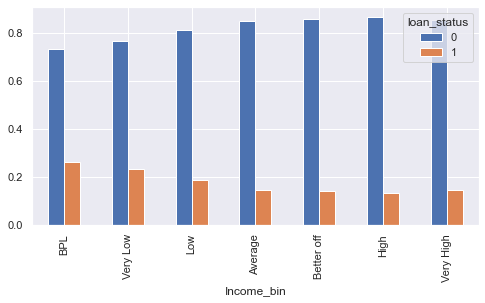

In [87]:
Income_bin.div(Income_bin.sum(axis=1),axis=0).plot(kind='bar',figsize=(8,4))

### Inference:

- There's a high possibility of borrower defaulting (charged-off) when the income is below poverty line, very low and low category. Whereas, there are few cases where customers with high and very high income also have defaulted the loan.

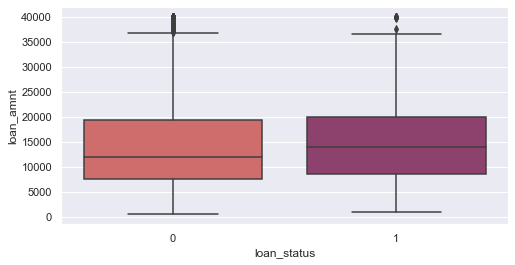

In [88]:
# The relationship between the loan_status and the Loan Amount 
encode_dict={'Charged Off':1,'Fully Paid':0}
plt.figure(figsize=(8,4))
sns.boxplot(x='loan_status',y='loan_amnt',data=loan_data,palette='flare')
plt.show()

In [89]:
# summary statistics for the loan amount, grouped by the loan_status.

loan_data.groupby('loan_status')['loan_amnt'].describe().round()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,317696.0,13875.0,8302.0,500.0,7500.0,12000.0,19275.0,40000.0
1,77523.0,15133.0,8504.0,1000.0,8575.0,14000.0,20000.0,40000.0


### Inference:

- If the loan amount is higher we have a slight increase in the likelihood of being charged off. This makes sense, it is often harder to repay larger loans than smaller loans

## EDA w.r.t loan_status and int_rate

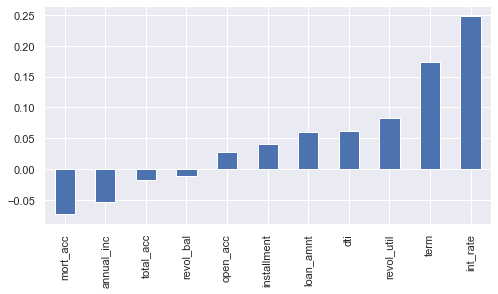

In [90]:
# Correlation of the numeric features to the loan_status column

plt.figure(figsize=(8,4))
loan_data.corr()['loan_status'].sort_values().drop('loan_status').plot(kind='bar')
plt.show()

### Inference:

- As the interest rates goes down, it's easier to pay loan whereas if the interest rates increased there's more possibility of charged off.

<Figure size 576x288 with 0 Axes>

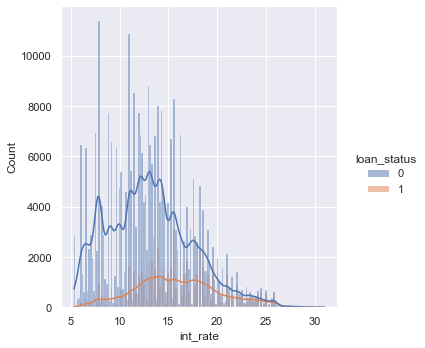

In [91]:
plt.figure(figsize=(8,4))
sns.displot(data=loan_data,x='int_rate',hue='loan_status',kde=True)
plt.show()

In [92]:
feature_names()

Columns with category datatypes (Categorical Features) are : 
 ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'earliest_cr_line', 'pub_rec', 'initial_list_status', 'application_type', 'pub_rec_bankruptcies', 'address']
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Columns with integer and float datatypes (Numerical Features) are : 
 ['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'loan_status', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc']


### EDA w.r.t home_ownership:

In [93]:
loan_data['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

### Inference:

- The majority of people have home ownership as MORTGAGE

## The relationship between Grades and loan_status:

In [94]:
# What are the unique possible grades and subgrades ?
sorted(loan_data['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [95]:
loan_data['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

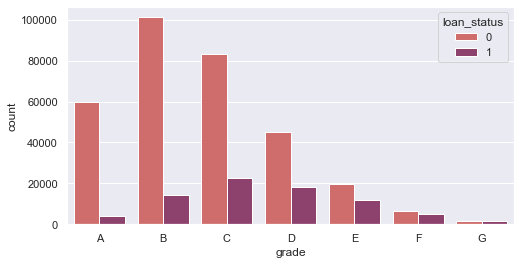

In [96]:
# Create a countplot per grade. Set the hue to the loan_status label.
order = sorted(loan_data['grade'].unique())
plt.figure(figsize=(8,4))
sns.countplot(x='grade',data=loan_data,hue='loan_status',order=order,palette='flare')
plt.show()

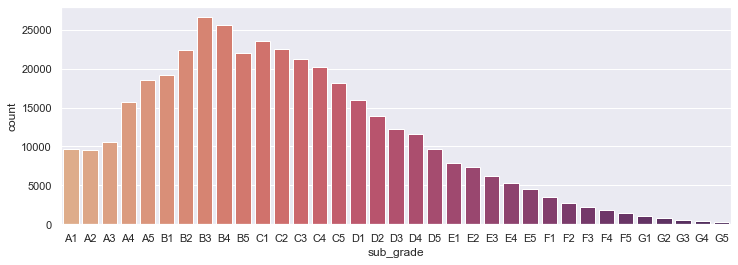

In [97]:
# Display a count plot per subgrade

plt.figure(figsize=(12,4))
order = sorted(loan_data['sub_grade'].unique())
sns.countplot(x='sub_grade',data=loan_data,order=order,palette='flare')
plt.show()

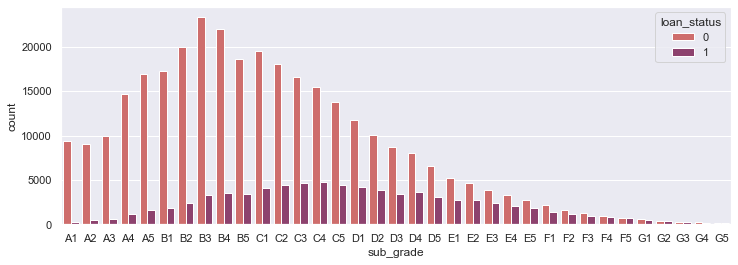

In [98]:
# Create a countplot per sub_grade. Set the hue to the loan_status label.

order = sorted(loan_data['sub_grade'].unique())
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',data=loan_data,hue='loan_status',order=order,palette='flare')
plt.show()

### Inference:

- It is obvious that F and G grades have a high default rate. We will need to have a closer look at them.

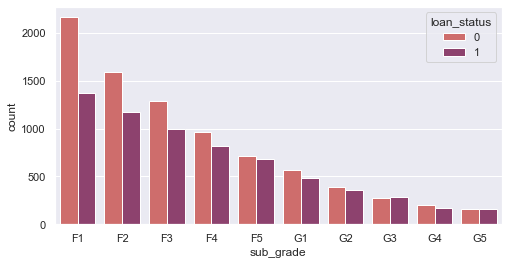

In [99]:
# More analysis

filtered_f_g=loan_data[(loan_data.grade=='F') | (loan_data.grade=='G')]
order = sorted(filtered_f_g['sub_grade'].unique())
plt.figure(figsize=(8,4))
sns.countplot(x='sub_grade',data=filtered_f_g,hue='loan_status',order=order,palette='flare')
plt.show()

### Inference:

- If your sub grade is G5: the probability that you will default is almost 50%

# Categorical and Dummy Variables:

In [100]:
loan_data.select_dtypes(['object']).columns

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'pub_rec',
       'initial_list_status', 'application_type', 'pub_rec_bankruptcies',
       'address'],
      dtype='object')

### Inference:

- We already know grade is part of sub_grade, so just dropping the grade feature.

In [101]:
loan_data=loan_data.drop('grade',axis=1)

In [102]:
# Convert the subgrade into dummy variables.

subgrade_dummies = pd.get_dummies(loan_data['sub_grade'],drop_first=True)
loan_data = pd.concat([loan_data.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [103]:
loan_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'Loan_bin', 'Income_bin', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3',
       'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5',
       'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2',
       'G3', 'G4', 'G5'],
      dtype='object')

In [104]:
loan_data.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'purpose',
       'earliest_cr_line', 'pub_rec', 'initial_list_status',
       'application_type', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [105]:
dummies = pd.get_dummies(loan_data[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)
loan_data = loan_data.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1)
loan_data = pd.concat([loan_data,dummies],axis=1)

In [106]:
loan_data['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [107]:
# Convert these to dummy variables, but replace NONE and ANY with OTHER.

# so that we end up with just 4 categories, MORTAGE, RENT, OWN, OTHER

loan_data['home_ownership']=loan_data['home_ownership'].replace(['NONE','ANY'],'OTHER')


In [108]:
home_ownership_dummies=pd.get_dummies(loan_data['home_ownership'],drop_first=True)
loan_data = loan_data.drop('home_ownership',axis=1)
loan_data = pd.concat([loan_data,home_ownership_dummies],axis=1)

In [109]:
loan_data['address'][0]

'0174 Michelle Gateway\r\nMendozaberg, OK 22690'

In [110]:
loan_data['address'].value_counts()[0]

8

### Let's feature engineer a zip code column from the address in the data set



In [111]:
loan_data['zip_code']=loan_data['address'].apply(lambda address:address[-5:])

In [112]:
loan_data['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [113]:
zip_code_dummies=pd.get_dummies(loan_data['zip_code'],drop_first=True)

In [114]:
loan_data=loan_data.drop(['zip_code','address'],axis=1)

In [115]:
loan_data = pd.concat([loan_data,zip_code_dummies],axis=1)

###  issue_d

In [116]:
loan_data['issue_d'].value_counts()

Oct-2014    14838
Jul-2014    12597
Jan-2015    11701
Dec-2013    10609
Nov-2013    10492
            ...  
Jan-2008        3
Dec-2007        2
Oct-2007        1
Nov-2007        1
Aug-2007        1
Name: issue_d, Length: 112, dtype: int64

### Need to drop issue_d feature
- This would be data leakage as we wouldn't know beforehand whether or not a loan would be issued when using our model, so in reality we wouldn't have an issue_date and hence droped this feature.

In [117]:
loan_data = loan_data.drop('issue_d',axis=1)

### FE on earliest_cr_line

In [118]:
loan_data['earliest_cr_line'].value_counts()

Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Jul-1955       1
Oct-1950       1
May-1958       1
Nov-1955       1
Aug-1959       1
Name: earliest_cr_line, Length: 684, dtype: int64

### Inference 
- This appears to be a historical time stamp feature. Extracting the year from this feature using apply function, then converting it to a numeric feature.

In [119]:
loan_data['earliest_cr_year']=loan_data['earliest_cr_line'].apply(lambda date:int(date[-4:]))

In [120]:
loan_data=loan_data.drop('earliest_cr_line',axis=1)

In [121]:
loan_data['earliest_cr_year'].value_counts()

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: earliest_cr_year, Length: 65, dtype: int64

In [122]:
loan_data.select_dtypes(['object']).columns

Index(['pub_rec', 'pub_rec_bankruptcies'], dtype='object')

In [123]:
convert_dtype

['pub_rec', 'pub_rec_bankruptcies']

In [124]:
for i in convert_dtype:
    loan_data[i]=loan_data[i].astype('int64')
print(loan_data[i].dtype)    

int64


### Convert the Loan_bin and Income_bin into dummy variables.

In [125]:
loan_data['Loan_bin'].value_counts()

Very Low Loan    163818
Lower Loan       150715
Average Loan      60192
High Loan         20494
Name: Loan_bin, dtype: int64

In [126]:
dummies = pd.get_dummies(loan_data['Loan_bin'],drop_first=True)

In [127]:
loan_data = loan_data.drop('Loan_bin',axis=1)

In [128]:
loan_data = pd.concat([loan_data,dummies],axis=1)

In [129]:
loan_data['Income_bin'].value_counts()

Low           196159
Very Low      116254
Average        67820
BPL            14583
Better off       358
High              30
Very High         14
Name: Income_bin, dtype: int64

In [130]:
# Convert these to dummy variables, but replace High and Very High with OTHER, 
# so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER

loan_data['Income_bin']=loan_data['Income_bin'].replace(['High','Very High'],'OTHER')

In [131]:
dummies=pd.get_dummies(loan_data['Income_bin'],drop_first=True)

In [132]:
loan_data=loan_data.drop('Income_bin',axis=1)

In [133]:
loan_data=pd.concat([loan_data,dummies],axis=1)

In [134]:
loan_data.select_dtypes(['object']).columns

Index([], dtype='object')

In [135]:
# numerical_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'open_acc', 'total_acc','revol_bal', 'revol_util']

In [136]:
numerical_cols

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'revol_bal',
 'total_acc']

In [137]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 87 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   loan_status                          395219 non-null  int64  
 6   dti                                  395219 non-null  float64
 7   open_acc                             395219 non-null  float64
 8   pub_rec                              395219 non-null  int64  
 9   revol_bal                            395219 non-null  float64
 10  revol_util                           395219 non-null  float64
 11  total_acc    

In [138]:
loan_data.shape

(395219, 87)

### Creating a copy of the data

In [139]:
loan=loan_data.copy()

### Inferences:
- We have converted all the categorical data into one hot endcoded dummy variables.
- We have now 3,95,219 rows and 86 columns in our data.
- We are ready for model building and training on these numerical features.




- open_acc : The number of open credit lines in the borrower's credit file.
- total_acc : The total number of credit lines currently in the borrower's credit file


# Logistics Regression Model Building:


### Assigning the featurs as X and target as y


In [140]:
X=loan.drop(["loan_status"],axis=1)

In [141]:
y=loan["loan_status"]

In [142]:
X.shape

(395219, 86)

## Splitting data into train , validation and test

In [143]:
# Train, CV, test split

from sklearn.model_selection import train_test_split
# 0.6, 0.2, 0.2 split

X_tr_cv,X_test,y_tr_cv, y_test = train_test_split(X,y,test_size=0.2, random_state =42)

X_train,X_val,y_train, y_val = train_test_split(X_tr_cv,y_tr_cv,test_size=0.2, random_state =42)



In [144]:
X_train.shape

(252940, 86)

# Missing value and Outlier treatment on Train Data

-  At this point , we will do the missing value handling using **median imputation** for missing value for **'mort_acc'**
- At this point , we will do the outliers handling/treatment using median imputation for missing value for **all the numerical features**.

In [145]:
missingvalue(X_train)

Total records in our data = 252940 where missing values are as follows:


,Total Missing,In Percent
mort_acc,23889,9.44
OTHER,0,0.00
purpose_vacation,0,0.00
purpose_small_business,0,0.00
purpose_renewable_energy,0,0.00
...,...,...
D2,0,0.00
D1,0,0.00
C5,0,0.00
C4,0,0.00


In [146]:
X_train['mort_acc'].value_counts()

0.0     89391
1.0     38512
2.0     31881
3.0     24442
4.0     17865
5.0     11556
6.0      7123
7.0      3880
8.0      2016
9.0      1067
10.0      548
11.0      315
12.0      164
13.0       95
14.0       70
15.0       42
16.0       19
19.0       12
18.0       12
20.0        9
17.0        8
24.0        7
22.0        4
25.0        3
32.0        2
26.0        2
27.0        2
31.0        1
34.0        1
30.0        1
21.0        1
Name: mort_acc, dtype: int64

In [147]:
X_train['mort_acc'].median()

1.0

### Imputing mort_acc with median 

In [148]:
X_train['mort_acc'] = X_train['mort_acc'].fillna(X_train['mort_acc'].median())

In [149]:
X_train['mort_acc'].isnull().sum()

0

In [150]:
missingvalue(X_train)

Total records in our data = 252940 where missing values are as follows:


,Total Missing,In Percent
loan_amnt,0,0.0
purpose_educational,0,0.0
purpose_small_business,0,0.0
purpose_renewable_energy,0,0.0
purpose_other,0,0.0
...,...,...
D1,0,0.0
C5,0,0.0
C4,0,0.0
C3,0,0.0


### Feature Engineering on mort_acc on train data

In [151]:
X_train['mort_acc'] = X_train['mort_acc'].apply(lambda x: 1 if x > 0.0 else 0)

In [152]:
X_train_copy1 = X_train.copy()

In [153]:
### Outlier Treatment on numerical cols on train data

numerical_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'open_acc', 'total_acc','revol_bal', 'revol_util','dti']

In [154]:
# numerical_cols_new = set(X_train_copy1.select_dtypes(['number']).columns)

In [155]:
q1 = X_train_copy1[numerical_cols].quantile(0.25)

In [156]:
q3 = X_train_copy1[numerical_cols].quantile(0.75)

In [157]:
iqr = q3-q1

In [158]:
 X_train_copy1 = X_train_copy1[~((X_train_copy1[numerical_cols]<q1-1.5*iqr)|(X_train_copy1[numerical_cols]>q3+1.5*iqr)).any(axis=1)]

In [159]:
X_train_copy1 = X_train_copy1.reset_index(drop = True)

In [160]:
X_train.shape[0]

252940

In [161]:
X_train.shape[0] - X_train_copy1.shape[0]

35396

### Inference:
- We can treat 35,396 values using iqr based median imputation.

In [162]:
for i in numerical_cols:
    X_train[i] = np.where(X_train[i] > X_train[i].quantile(0.75) + 
                          (X_train[i].quantile(0.75) - 
                            X_train[i].quantile(0.25))*1.5,
                          X_train[i].quantile(0.5),X_train[i]
                         )
    X_train[i] = np.where(X_train[i] < X_train[i].quantile(0.25) - 
                          (X_train[i].quantile(0.75) - 
                            X_train[i].quantile(0.25))*1.5,
                          X_train[i].quantile(0.5),X_train[i]
                         )
    
    

In [163]:
numerical_cols

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'open_acc',
 'total_acc',
 'revol_bal',
 'revol_util',
 'dti']

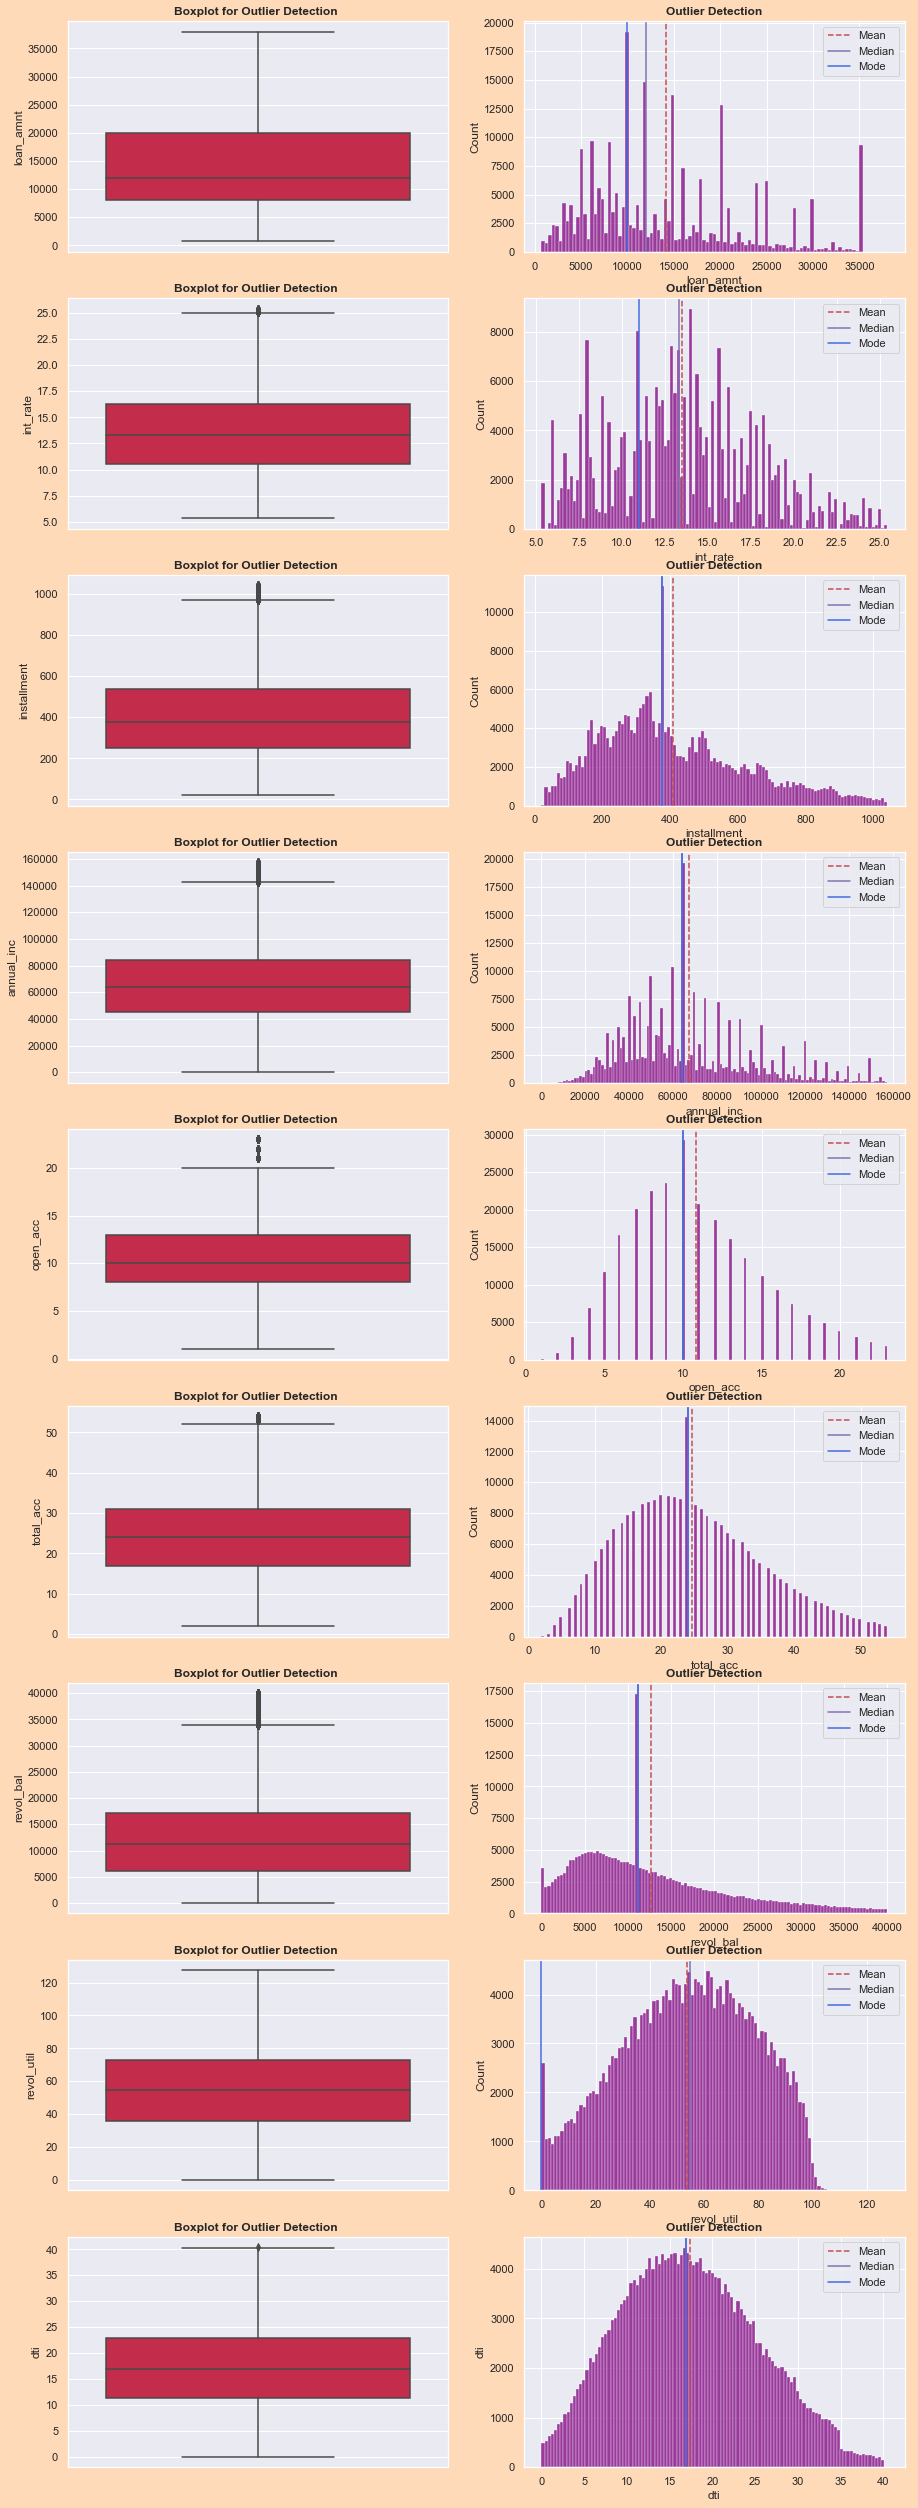

In [164]:
numerical_feat(X_train,numerical_cols,len(numerical_cols),2,15,45)

### Inference:
- As we can see from the above plots, the train data is free from outliers from all the important and required numerical features

# Missing value and Outlier treatment on Cross Validation Data

### Imputing mort_acc with median on cross val data

In [165]:
X_val['mort_acc'] = X_val['mort_acc'].fillna(X_val['mort_acc'].median())

In [166]:
missingvalue(X_val)

Total records in our data = 63235 where missing values are as follows:


,Total Missing,In Percent
loan_amnt,0,0.0
purpose_educational,0,0.0
purpose_small_business,0,0.0
purpose_renewable_energy,0,0.0
purpose_other,0,0.0
...,...,...
D1,0,0.0
C5,0,0.0
C4,0,0.0
C3,0,0.0


### Feature Engineering on mort_acc on cross validation data

In [167]:
X_val_copy1 = X_val.copy()

In [168]:
X_val['mort_acc'] = X_val['mort_acc'].apply(lambda x: 1 if x > 0.0 else 0)

# Missing value and Outlier treatment on Test Data

### Imputing mort_acc with median on test data

In [169]:
X_test['mort_acc'] = X_test['mort_acc'].fillna(X_test['mort_acc'].median())

In [170]:
missingvalue(X_test)

Total records in our data = 79044 where missing values are as follows:


,Total Missing,In Percent
loan_amnt,0,0.0
purpose_educational,0,0.0
purpose_small_business,0,0.0
purpose_renewable_energy,0,0.0
purpose_other,0,0.0
...,...,...
D1,0,0.0
C5,0,0.0
C4,0,0.0
C3,0,0.0


### Feature Engineering on mort_acc on test data

In [171]:
X_test['mort_acc'] = X_test['mort_acc'].apply(lambda x: 1 if x > 0.0 else 0)

### Scaling the data

In [172]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [173]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [174]:
model.coef_

array([[ 3.65615600e-05,  4.18944470e-03,  5.41616940e-02,
        -1.78913194e-04, -1.00860674e-05,  5.00452144e-02,
         1.32163868e-02,  6.93097555e-04, -2.24564992e-05,
         6.76134818e-03,  1.13294105e-03, -2.01619008e-03,
         3.78402707e-04, -4.20827652e-04, -4.54078554e-04,
        -6.48873937e-04, -7.00522527e-04, -6.65078356e-04,
        -7.71402082e-04, -7.93010634e-04, -5.78913198e-04,
        -3.70949879e-04, -2.12162456e-04, -2.02491140e-05,
         1.45440191e-04,  2.85235483e-04,  2.87832831e-04,
         3.80077516e-04,  4.21537998e-04,  3.72643170e-04,
         4.81211777e-04,  4.26847275e-04,  4.15841120e-04,
         4.68101387e-04,  3.90512991e-04,  3.74863520e-04,
         3.56513503e-04,  2.36327575e-04,  2.24530200e-04,
         1.87795101e-04,  1.63153254e-04,  1.62885532e-04,
         1.03651041e-04,  7.67843963e-05,  7.20999400e-05,
         3.48750171e-05,  3.33024977e-05,  1.09501775e-03,
         7.81536142e-04, -4.09260585e-06, -2.31667680e-0

In [175]:
model.intercept_

array([-8.54251008e-06])

### Inference:
- The model intercept is very close to zero , which means , our model has very less noise.

# Model 1

### Hyper-param tuning

In [176]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
train_scores=[]
val_scores=[]
scaler = StandardScaler()

# imputer = SimpleImputer(strategy='median',missing_values=np.nan)

for la in np.arange(0.01,100.0,5):
    scaled_lr = make_pipeline(scaler, LogisticRegression(C=1/la))
    scaled_lr.fit(X_train,y_train)
    train_score = scaled_lr.score(X_train,y_train)
    val_score = scaled_lr.score(X_val,y_val)
    train_scores.append(train_score)
    val_scores.append(val_score)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [177]:
len(val_scores)

20

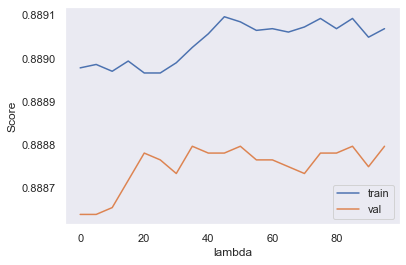

In [178]:
plt.figure()
plt.plot(list(np.arange(0.01,100.0,5)),train_scores,label="train")
plt.plot(list(np.arange(0.01, 100.0, 5)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("Score")
plt.grid()
plt.show()

In [179]:
np.argmax(val_scores)

7

In [180]:
val_scores[7]

0.8887957618407527

In [181]:
l_best = 0.01+5*7
l_best

35.01

### Model with lambda = 35.01

In [182]:
scaled_lr = make_pipeline(scaler, LogisticRegression(C = 1 /l_best))
scaled_lr.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.028563267637817767))])

In [183]:
test_score = scaled_lr.score(X_test,y_test)
print(test_score)

y_pred = scaled_lr.predict(X_test)

0.8895804868174687


In [184]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score

print(f"Accuracy : {accuracy_score(y_test,y_pred)*100}%")
print(f"recall_score : {recall_score(y_test,y_pred)*100}%")
print(f"precision_score : {precision_score(y_test,y_pred)*100}%")
print(f"f1_score : {f1_score(y_test,y_pred)*100}%")
print(f"AUC_score : {metrics.roc_auc_score(y_test,y_pred)*100}%")
print(f"confusion_matrix :")
print(confusion_matrix(y_test,y_pred))

Accuracy : 88.95804868174687%
recall_score : 45.44452370144608%
precision_score : 95.69848422777551%
f1_score : 61.62504396763981%
AUC_score : 72.474709864806%
confusion_matrix :
[[63308   315]
 [ 8413  7008]]


In [185]:
# Predicted     fully_paid    charged_off
# Actual
# fully_paid       63308         315
# charged_off      8413         7008

In [186]:
# Let's evaluate the other metrics as well

confusion = confusion_matrix(y_test,y_pred)
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negative
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


### Calculate the sensitivity

In [187]:
TP/(TP+FN)

0.4544452370144608

### Calculate the specificity

In [188]:
TN/(TN+FP)

0.9950489602816591

In [189]:
from sklearn.metrics import classification_report

print(f"{classification_report(y_test,y_pred)}")

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     63623
           1       0.96      0.45      0.62     15421

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.78     79044
weighted avg       0.90      0.89      0.87     79044



### ROC function

In [190]:
def draw_roc(actual, probs):
    fpr,tpr,thresholds = metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' %auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None
    

In [191]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred,drop_intermediate=False)

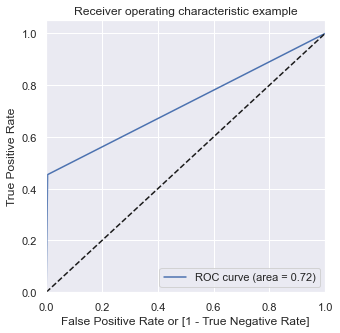

In [192]:
# Calling the ROC function

draw_roc(y_test,y_pred)

### Checking for precision_recall_curve metric



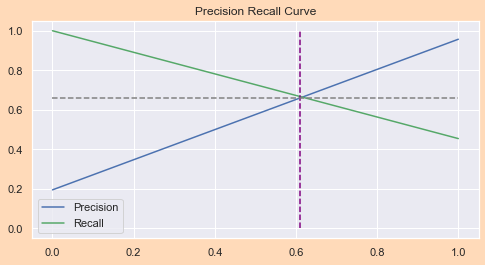

In [193]:
from sklearn.metrics import precision_recall_curve

p,r, thresholds = precision_recall_curve(y_test,y_pred)

fig = plt.figure(figsize=(8,4))
fig.set_facecolor("peachpuff")

# Precision Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test,y_pred)
plt.plot(thresholds, precision[:-1], "b", label='Precision')
plt.plot(thresholds, recall[:-1], "g", label='Recall')
plt.vlines(x=0.61,ymax=1,ymin=0.0,color="purple",linestyles="--")
plt.hlines(y=0.66,xmax=1,xmin=0.0,color="grey",linestyles="--")
plt.title('Precision Recall Curve')
plt.legend()
plt.show()

# Inferences from Model 1:

- **Defaulters/Irresponsible Business or Customers:** For our simplest model 1 , we are getting fi-score as **62 %** to check if the credit line can be extended to the business/customers who have a **higher chances of defaulting/ not repaying** the loan/credit taken. Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.

- **Honest/Responsible Business or Customers :** For our simplest model 1, we are getting fi-score as **94 %** to check if the credit line can be extended to the business/customers who have a **higher chances of fully repaying the loan/credit taken.** This is important as we can lose out on an opportunity to finance more supply chains and earn interest in it.

After the preprocessing and encoding steps, we had a total of 87 features and not all of these may be useful in forecasting the sales. Alternatively we can select the top 5 or top 7 features, which had a major contribution in forecasting sales values.

The idea is to have a less complex model without compromising on the overall model performance.

# Model 2:

### Fixing the imbalance issue in target feature:

    - Here we will give class weights manually for 0 (Fully paid):0.2, 1 (Charged off) :0.8
    
    - We will also change the range of lambda to see any effect.

In [194]:
# Checking for imbalanced data:

loan['loan_status'].value_counts(normalize=True)*100

0    80.384799
1    19.615201
Name: loan_status, dtype: float64

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

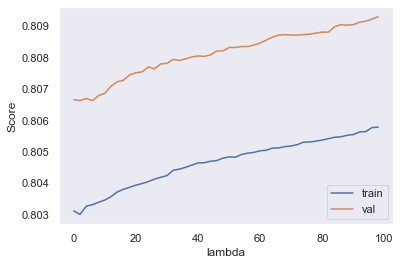

In [195]:
# Hyper-parameter tuning

train_scores=[]
val_scores=[]
scaler=StandardScaler()

for la in np.arange(0.01,100.0,2):
    scaled_lr = make_pipeline(scaler, LogisticRegression(
        C=1/la,class_weight={0:0.2,1:0.8}))
    scaled_lr.fit(X_train,y_train)
    train_score = scaled_lr.score(X_train, y_train)
    val_score = scaled_lr.score(X_val, y_val)
    train_scores.append(train_score)
    val_scores.append(val_score)
    
plt.figure()
plt.plot(list(np.arange(0.01, 100.0, 2)), train_scores, label = "train")
plt.plot(list(np.arange(0.01, 100.0, 2)), val_scores, label = "val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("Score")
plt.grid()
plt.show()

In [196]:
np.argmax(val_scores)

49

In [197]:
val_scores[49]

0.809298647900688

In [198]:
l_best2 = 0.01+2*49
l_best2

98.01

In [199]:
# Model with lambda = 98.01
scaled_lr = make_pipeline(scaler, LogisticRegression(C=1/l_best2))
scaled_lr.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.010203040506070809))])

In [200]:
test_score = scaled_lr.score(X_test, y_test)
print(test_score)

y_pred2 = scaled_lr.predict(X_test)

0.8895804868174687


In [201]:


print(f"Accuracy : {accuracy_score(y_test, y_pred2)*100}%")
print(f"recall_score : {recall_score(y_test, y_pred2)*100}%")
print(f"precision_score : {precision_score(y_test, y_pred2)*100}%")
print(f"f1_score : {f1_score(y_test, y_pred2)*100}%")
print(f"AUC score : {metrics.roc_auc_score( y_test, y_pred2)*100}%")
print(f"confusion_matrix :")
print(confusion_matrix(y_test, y_pred2))

Accuracy : 88.95804868174687%
recall_score : 45.54827832176901%
precision_score : 95.49966009517335%
f1_score : 61.6789603090973%
AUC score : 72.51401310584153%
confusion_matrix :
[[63292   331]
 [ 8397  7024]]


In [202]:
# Let's evaluate the other metrics as well
confusion = confusion_matrix(y_test, y_pred2)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [203]:
# Calculate the sensitivity

TP/(TP+FN)

0.45548278321769015

In [204]:
# Calculate the specificity

TN/(TN+FP)

0.9947974788991403

In [205]:
# Checking the classification_report

from sklearn.metrics import classification_report

print(f"{classification_report(y_test, y_pred2)}")

              precision    recall  f1-score   support

           0       0.88      0.99      0.94     63623
           1       0.95      0.46      0.62     15421

    accuracy                           0.89     79044
   macro avg       0.92      0.73      0.78     79044
weighted avg       0.90      0.89      0.87     79044



In [206]:
fpr2, tpr2, thresholds2 = metrics.roc_curve( y_test, y_pred2, drop_intermediate = False )
fpr2, tpr2, thresholds2

(array([0.        , 0.00520252, 1.        ]),
 array([0.        , 0.45548278, 1.        ]),
 array([2, 1, 0], dtype=int64))

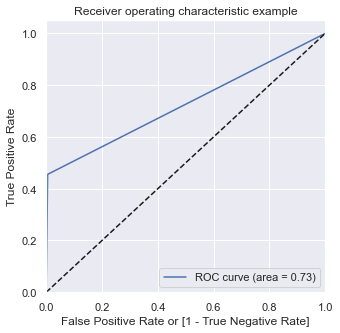

In [207]:
# Calling the ROC function

draw_roc(y_test, y_pred2)

In [208]:
# Checking for precision_recall_curve metric

from sklearn.metrics import precision_recall_curve

p2, r2, thresholds2 = precision_recall_curve(y_test, y_pred)
p2, r2, thresholds2

(array([0.19509387, 0.95698484, 1.        ]),
 array([1.        , 0.45444524, 0.        ]),
 array([0, 1], dtype=int64))

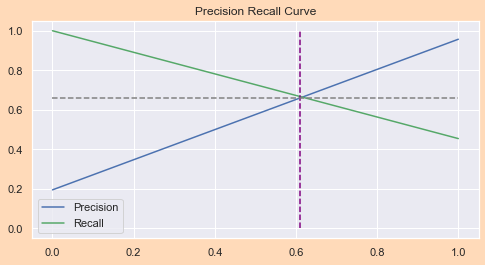

In [209]:
fig = plt.figure(figsize = (8,4))
fig.set_facecolor("peachpuff")

# Precision Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(thresholds, precision[:-1], "b",label='Precision')
plt.plot(thresholds, recall[:-1], "g",label='Recall')
plt.vlines(x=0.61,ymax=1,ymin=0.0,color="purple",linestyles="--")
plt.hlines(y=0.66,xmax=1,xmin=0.0,color="grey",linestyles="--")
plt.title('Precision Recall Curve')
plt.legend()
plt.show()

## Inferences from Model 2:

- **Defaulters/Irresponsible Business or Customers:** For our model 2 ( with balancing weights) , we are getting fi-score as **62 %** to check if the credit line can be extended to the business/customers who have a **higher chances of defaulting/ not repaying** the loan/credit taken. Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.
- **Honest/Responsible Business or Customers :** For our model 2 ( with balancing weights) , we are getting fi-score as **94 %** to check if the credit line can be extended to the business/customers who have a **higher chances of fully repaying the loan/credit taken.** This is important as we can lose out on an opportunity to finance more supply chains and earn interest in it.

# Model 3:

- Here we will change the class- weights and do re-balancing.
- In addition we will select only the features which are important for our models using RFE (Recurrsive Feature Elimaination)

In [210]:
# Importing 'LogisticRegression' and creating a LogisticRegression object
# For pipeline creation


from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
imputer = SimpleImputer(strategy='median',missing_values=np.nan)
lr3 = Pipeline(steps=[('imputer',imputer),('scaler',scaler),
                      ('logistic_model',LogisticRegression())])

In [211]:
# Import RFE and select 20 variables

from sklearn.feature_selection import RFE
type(lr3)

sklearn.pipeline.Pipeline

In [212]:
rfe = RFE(lr3['logistic_model'], n_features_to_select=20)
# running RFE with 20 variables as output

In [213]:
rfe = rfe.fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [214]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('loan_amnt', False, 58),
 ('term', True, 1),
 ('int_rate', False, 33),
 ('installment', False, 52),
 ('annual_inc', False, 61),
 ('dti', False, 50),
 ('open_acc', False, 38),
 ('pub_rec', False, 34),
 ('revol_bal', False, 59),
 ('revol_util', False, 45),
 ('total_acc', False, 46),
 ('mort_acc', False, 15),
 ('pub_rec_bankruptcies', False, 49),
 ('A2', True, 1),
 ('A3', True, 1),
 ('A4', True, 1),
 ('A5', True, 1),
 ('B1', True, 1),
 ('B2', True, 1),
 ('B3', True, 1),
 ('B4', True, 1),
 ('B5', False, 8),
 ('C1', False, 16),
 ('C2', False, 60),
 ('C3', False, 41),
 ('C4', False, 31),
 ('C5', False, 42),
 ('D1', False, 23),
 ('D2', False, 20),
 ('D3', False, 53),
 ('D4', False, 18),
 ('D5', False, 19),
 ('E1', False, 11),
 ('E2', False, 5),
 ('E3', False, 7),
 ('E4', False, 6),
 ('E5', False, 4),
 ('F1', False, 43),
 ('F2', False, 3),
 ('F3', False, 36),
 ('F4', False, 55),
 ('F5', True, 1),
 ('G1', True, 1),
 ('G2', True, 1),
 ('G3', True, 1),
 ('G4', True, 1),
 ('G5', False, 2),
 ('ve

In [215]:
# Putting all the columns selected by RFE in the variable 'new_col'

new_col = X_train.columns[rfe.support_]

In [216]:
# Select only the columns selected by RFE

X_train = X_train[new_col]

In [217]:
X_val = X_val[new_col]

In [218]:
X_test = X_test[new_col]

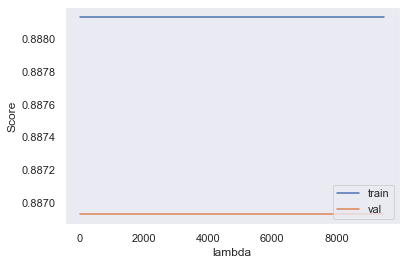

In [219]:
# Hyper-parameter tuning

train_scores= []
val_scores=[]
scaler = StandardScaler()
for la in np.arange(0.01, 10000.0, 500):
    scaled_lr = make_pipeline(scaler, LogisticRegression(C=1/la))
    scaled_lr.fit(X_train, y_train)
    train_score = scaled_lr.score(X_train, y_train)
    val_score = scaled_lr.score(X_val, y_val)
    train_scores.append(train_score)
    val_scores.append(val_score)
    
plt.figure()
plt.plot(list(np.arange(0.01, 10000.0, 500)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 10000.0, 500)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("Score")
plt.grid()
plt.show()

    

In [220]:
np.argmax(val_scores)

0

In [221]:
val_scores[0]

0.8869297066497984

In [222]:
l_best3 = 0.01+ 500*0
l_best3

0.01

In [223]:
# Model with lambda = 0.01

scaled_lr = make_pipeline(scaler, LogisticRegression(C=1/l_best3))
scaled_lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=100.0))])

In [224]:
test_score = scaled_lr.score(X_test, y_test)
print(test_score)



0.8888973230099692


In [225]:
y_pred3 = scaled_lr.predict(X_test)

In [226]:
print(f"Accuracy : {accuracy_score(y_test, y_pred3)*100} %")
print(f"recall_score : {recall_score(y_test, y_pred3)*100} %")
print(f"precision_score : {precision_score(y_test, y_pred3)*100} %")
print(f"f1_score : {f1_score(y_test, y_pred3)*100} %")
print(f"AUC score : {metrics.roc_auc_score( y_test, y_pred3)*100} %")
print(f"confusion_matrix :")
print(confusion_matrix(y_test, y_pred3))

Accuracy : 88.88973230099691 %
recall_score : 43.05168277024836 %
precision_score : 100.0 %
f1_score : 60.19038984587489 %
AUC score : 71.52584138512418 %
confusion_matrix :
[[63623     0]
 [ 8782  6639]]


In [227]:
# Checking the classification_report

print(f"{classification_report(y_test, y_pred3)}")

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     63623
           1       1.00      0.43      0.60     15421

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



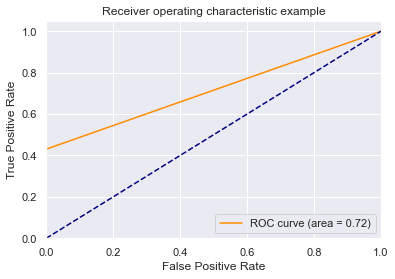

In [228]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Inferences from Model 3:

- **Defaulters/Irresponsible Business or Customers:** For our model 3 , we are getting fi-score as **60 %** to check if the credit line can be extended to the business/customers who have a **higher chances of defaulting/ not repaying** the loan/credit taken. Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.
- **Honest/Responsible Business or Customers :** For our model 2 ( with balancing weights) , we are getting fi-score as **100 %** to check if the credit line can be extended to the business/customers who have a **higher chances of fully repaying the loan/credit taken.** This is important as we can lose out on an opportunity to finance more supply chains and earn interest in it.

# Model 4:
- Here we will be eliminating featres based on VIF score and model building using stats model.

In [229]:
loan.shape

(395219, 87)

In [230]:
# Assigning the features as X and target as y

X = loan.drop(["loan_status"],axis=1)
y= loan['loan_status']

In [231]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,
                                                    test_size=0.3
                                                    ,random_state=100)


In [232]:
# Imputing mort_acc with median

X_train['mort_acc'] = X_train['mort_acc'].fillna(X_test['mort_acc'].median())
missingvalue(X_train)

Total records in our data = 276653 where missing values are as follows:


,Total Missing,In Percent
loan_amnt,0,0.0
purpose_educational,0,0.0
purpose_small_business,0,0.0
purpose_renewable_energy,0,0.0
purpose_other,0,0.0
...,...,...
D1,0,0.0
C5,0,0.0
C4,0,0.0
C3,0,0.0


In [233]:
# Feature Engineering on mort_acc on train data

X_train['mort_acc'] = X_train['mort_acc'].apply(lambda x: 1 if x > 0.0 else 0)

In [234]:
# Outliers removal for train data

for i in numerical_cols:
    X_train[i] = np.where(X_train[i] > X_train[i].quantile(0.75) + 
                          (X_train[i].quantile(0.75) - 
                          X_train[i].quantile(0.25))*1.5, 
                          X_train[i].quantile(0.5),X_train[i])
    X_train[i] = np.where(X_train[i] < X_train[i].quantile(0.25) - 
                         (X_train[i].quantile(0.75) - 
                         X_train[i].quantile(0.25))*1.5,
                          X_train[i].quantile(0.5), X_train[i]
                         )

In [235]:
# For test data

X_test['mort_acc']=X_test['mort_acc'].fillna(X_test['mort_acc'].median())

In [236]:
# Feature Engineering on mort_acc on test data

X_test['mort_acc'] = X_test['mort_acc'].apply(lambda x: 1 if x > 0.0 else 0)

In [237]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            loan_status   No. Observations:               276653
Model:                            GLM   Df Residuals:                   276566
Model Family:                Binomial   Df Model:                           86
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -70810.
Date:                Sat, 03 Sep 2022   Deviance:                   1.4162e+05
Time:                        22:17:21   Pearson chi2:                 1.58e+05
No. Iterations:                    30   Pseudo R-squ. (CS):             0.3798
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -26.6016   2.31e+04     -0.001      0.999   -4.53e+04    4.53e+04
loan_amnt                            2.775e-05   3.24e-06      8.566      0.000    2.14e-05    3.41e-05
term                                    0.4158      0.020     21.057      0.000       0.377       0.455
int_rate                               -0.0580      0.006    -10.179      0.000      -0.069      -0.047
installment                          7.782e-06   7.37e-05      0.106      0.916      -0.000       0.000
annual_inc                          -3.537e-06   4.58e-07     -7.716      0.000   -4.43e-06   -2.64e-06
dti                                     0.0240      0.001     25.516      0.000       0.022       0.026
open_acc                                0.0208      0.002     10.124      0.000       0.017       0.025
pub_rec                                 0.1811      0.036      5.054      0.000       0.111       0.251
revol_bal                           -6.594e-06      1e-06     -6.587      0.000   -8.56e-06   -4.63e-06
revol_util                              0.0034      0.000      9.880      0.000       0.003       0.004
total_acc                              -0.0068      0.001     -7.819      0.000      -0.009      -0.005
mort_acc                               -0.1351      0.018     -7.510      0.000      -0.170      -0.100
pub_rec_bankruptcies                   -0.1431      0.040     -3.589      0.000      -0.221      -0.065
A2                                      0.4047      0.119      3.400      0.001       0.171       0.638
A3                                      0.5973      0.113      5.263      0.000       0.375       0.820
A4                                      0.7080      0.106      6.667      0.000       0.500       0.916
A5                                      0.9264      0.103      8.984      0.000       0.724       1.128
B1                                      1.1786      0.102     11.526      0.000       0.978       1.379
B2                                      1.2445      0.102     12.168      0.000       1.044       1.445
B3                                      1.3928      0.102     13.597      0.000       1.192       1.594
B4                                      1.5523      0.104     14.971      0.000       1.349       1.756
B5                                      1.6850      0.105     16.048      0.000       1.479       1.891
C1                                      1.8387      0.106     17.380      0.000       1.631       2.046
C2                                      1.9533      0.107     18.229      0.000       1.743       2.163
C3                                      2.1516      0.109     19.827      0.000       1.939       2.364
C4                                      2.2354      0.110     20.31

### Inference:
- There are quite a few variable which have a p-value greater than 0.05. 
- We will need to take care of them. But first, let us also look at the VIFs.


In [241]:
# to drop :installment, purpose_wedding, OTHER, Lower Loan

In [242]:
X_train.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2',
       'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4',
       'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1',
       'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
       '11650', '22690', '29597', '30723', '48052', '7046

In [257]:
X_train.drop(['installment','purpose_wedding','OTHER','05113',\
              '11650', '22690', '29597', '30723', '48052', '70466', '86630', '93700','Lower Loan'], axis = 1, inplace = True)

# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            loan_status   No. Observations:               276653
Model:                            GLM   Df Residuals:                   276583
Model Family:                Binomial   Df Model:                           69
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2423e+05
Date:                Sun, 04 Sep 2022   Deviance:                   2.4845e+05
Time:                        09:27:27   Pearson chi2:                 2.77e+05
No. Iterations:                     6   Pseudo R-squ. (CS):            0.08748
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -3.8366      0.090    -42.397      0.000      -4.014      -3.659
loan_amnt                            2.391e-05    1.3e-06     18.374      0.000    2.14e-05    2.65e-05
term                                    0.3990      0.014     29.176      0.000       0.372       0.426
annual_inc                          -3.807e-06   3.45e-07    -11.050      0.000   -4.48e-06   -3.13e-06
dti                                     0.0243      0.001     34.212      0.000       0.023       0.026
open_acc                                0.0213      0.002     13.850      0.000       0.018       0.024
pub_rec                                 0.2229      0.027      8.302      0.000       0.170       0.276
revol_bal                           -6.428e-06   7.52e-07     -8.542      0.000    -7.9e-06   -4.95e-06
revol_util                              0.0031      0.000     12.003      0.000       0.003       0.004
total_acc                              -0.0065      0.001    -10.134      0.000      -0.008      -0.005
mort_acc                               -0.1203      0.013     -8.987      0.000      -0.147      -0.094
pub_rec_bankruptcies                   -0.1841      0.030     -6.147      0.000      -0.243      -0.125
A2                                      0.3934      0.091      4.302      0.000       0.214       0.573
A3                                      0.5352      0.087      6.142      0.000       0.364       0.706
A4                                      0.7241      0.080      9.017      0.000       0.567       0.882
A5                                      0.8646      0.078     11.081      0.000       0.712       1.018
B1                                      0.9986      0.077     12.963      0.000       0.848       1.150
B2                                      1.0609      0.076     13.965      0.000       0.912       1.210
B3                                      1.1684      0.075     15.590      0.000       1.022       1.315
B4                                      1.2641      0.075     16.890      0.000       1.117       1.411
B5                                      1.4002      0.075     18.661      0.000       1.253       1.547
C1                                      1.4658      0.075     19.631      0.000       1.319       1.612
C2                                      1.6109      0.075     21.599      0.000       1.465       1.757
C3                                      1.6958      0.075     22.721      0.000       1.549       1.842
C4                                      1.7454      0.075     23.370      0.000       1.599       1.892
C5                                      1.7959      0.075     23.954      0.000       1.649       1.943
D1                                      1.8961      0.075     25.19

In [258]:
# Make a VIF dataframe for all the variables present
# Import 'variance_inflation_factor


from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
50,purpose_debt_consolidation,24.61
2,annual_inc,21.64
66,Low,19.24
0,loan_amnt,16.90
4,open_acc,12.93
...,...,...
68,Better off,1.04
44,G5,1.04
58,purpose_renewable_energy,1.03
51,purpose_educational,1.02


In [252]:
[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]


[16.938815240602587,
 2.096962306977737,
 189.24566913945895,
 21.94503083456716,
 7.783054515486704,
 13.081210278379793,
 4.8522101732988805,
 5.195058162292863,
 9.295284535910051,
 11.523856726087566,
 4.856736680720377,
 4.636087388514676,
 1.9976792137098969,
 2.143514809531118,
 2.7726874293517874,
 3.24583403833311,
 3.583147301860079,
 4.4614963240605805,
 5.690063436394148,
 6.084978834254997,
 5.722577122143501,
 6.618010719137796,
 6.833046218844247,
 6.967047800045357,
 7.304274133452545,
 7.167873333151484,
 7.0054018119128045,
 6.774613948105494,
 6.419345676982094,
 6.569713293838557,
 6.003733822397125,
 5.290316043227715,
 5.389280171082122,
 4.853771831926485,
 4.61190708435864,
 4.358797588563454,
 3.8087447784961745,
 3.314870694288346,
 2.9571063111071654,
 2.5384905087927843,
 2.0115659458983823,
 1.3945165699531137,
 1.2727944921866332,
 1.1970069073177703,
 1.1400107784646814,
 1.1002769323981898,
 2.2464342024407267,
 2.509074077985298,
 1394.1975932582063,
 2

In [259]:
X_train.shape[1]

69

In [253]:
X_train.columns

Index(['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4',
       'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1',
       'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'OWN', 'RENT', 'earliest_cr_year', 'Average Loan',
       'High Loan', 'Very Low', 'Low', 'Average', 'Better off'],
      dt

In [262]:
X_train.drop(['earliest_cr_year','application_type_INDIVIDUAL','int_rate'], axis = 1, inplace = True)

# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            loan_status   No. Observations:               276653
Model:                            GLM   Df Residuals:                   276583
Model Family:                Binomial   Df Model:                           69
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2423e+05
Date:                Sun, 04 Sep 2022   Deviance:                   2.4845e+05
Time:                        09:40:46   Pearson chi2:                 2.77e+05
No. Iterations:                     6   Pseudo R-squ. (CS):            0.08748
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -3.8366      0.090    -42.397      0.000      -4.014      -3.659
loan_amnt                            2.391e-05    1.3e-06     18.374      0.000    2.14e-05    2.65e-05
term                                    0.3990      0.014     29.176      0.000       0.372       0.426
annual_inc                          -3.807e-06   3.45e-07    -11.050      0.000   -4.48e-06   -3.13e-06
dti                                     0.0243      0.001     34.212      0.000       0.023       0.026
open_acc                                0.0213      0.002     13.850      0.000       0.018       0.024
pub_rec                                 0.2229      0.027      8.302      0.000       0.170       0.276
revol_bal                           -6.428e-06   7.52e-07     -8.542      0.000    -7.9e-06   -4.95e-06
revol_util                              0.0031      0.000     12.003      0.000       0.003       0.004
total_acc                              -0.0065      0.001    -10.134      0.000      -0.008      -0.005
mort_acc                               -0.1203      0.013     -8.987      0.000      -0.147      -0.094
pub_rec_bankruptcies                   -0.1841      0.030     -6.147      0.000      -0.243      -0.125
A2                                      0.3934      0.091      4.302      0.000       0.214       0.573
A3                                      0.5352      0.087      6.142      0.000       0.364       0.706
A4                                      0.7241      0.080      9.017      0.000       0.567       0.882
A5                                      0.8646      0.078     11.081      0.000       0.712       1.018
B1                                      0.9986      0.077     12.963      0.000       0.848       1.150
B2                                      1.0609      0.076     13.965      0.000       0.912       1.210
B3                                      1.1684      0.075     15.590      0.000       1.022       1.315
B4                                      1.2641      0.075     16.890      0.000       1.117       1.411
B5                                      1.4002      0.075     18.661      0.000       1.253       1.547
C1                                      1.4658      0.075     19.631      0.000       1.319       1.612
C2                                      1.6109      0.075     21.599      0.000       1.465       1.757
C3                                      1.6958      0.075     22.721      0.000       1.549       1.842
C4                                      1.7454      0.075     23.370      0.000       1.599       1.892
C5                                      1.7959      0.075     23.954      0.000       1.649       1.943
D1                                      1.8961      0.075     25.19

In [263]:
# to drop :purpose_educational, purpose_house,

In [264]:
X_train.drop(['purpose_educational','purpose_house'], axis = 1, inplace = True)

In [265]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            loan_status   No. Observations:               276653
Model:                            GLM   Df Residuals:                   276585
Model Family:                Binomial   Df Model:                           67
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2423e+05
Date:                Sun, 04 Sep 2022   Deviance:                   2.4846e+05
Time:                        09:41:22   Pearson chi2:                 2.77e+05
No. Iterations:                     6   Pseudo R-squ. (CS):            0.08747
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -3.7938      0.086    -43.946      0.000      -3.963      -3.625
loan_amnt                            2.396e-05    1.3e-06     18.429      0.000    2.14e-05    2.65e-05
term                                    0.3983      0.014     29.145      0.000       0.372       0.425
annual_inc                          -3.809e-06   3.45e-07    -11.055      0.000   -4.48e-06   -3.13e-06
dti                                     0.0243      0.001     34.206      0.000       0.023       0.026
open_acc                                0.0213      0.002     13.851      0.000       0.018       0.024
pub_rec                                 0.2230      0.027      8.308      0.000       0.170       0.276
revol_bal                           -6.434e-06   7.52e-07     -8.551      0.000   -7.91e-06   -4.96e-06
revol_util                              0.0031      0.000     11.984      0.000       0.003       0.004
total_acc                              -0.0065      0.001    -10.132      0.000      -0.008      -0.005
mort_acc                               -0.1200      0.013     -8.970      0.000      -0.146      -0.094
pub_rec_bankruptcies                   -0.1842      0.030     -6.152      0.000      -0.243      -0.126
A2                                      0.3934      0.091      4.301      0.000       0.214       0.573
A3                                      0.5357      0.087      6.147      0.000       0.365       0.706
A4                                      0.7246      0.080      9.023      0.000       0.567       0.882
A5                                      0.8653      0.078     11.089      0.000       0.712       1.018
B1                                      0.9992      0.077     12.972      0.000       0.848       1.150
B2                                      1.0616      0.076     13.975      0.000       0.913       1.210
B3                                      1.1691      0.075     15.599      0.000       1.022       1.316
B4                                      1.2649      0.075     16.902      0.000       1.118       1.412
B5                                      1.4010      0.075     18.672      0.000       1.254       1.548
C1                                      1.4669      0.075     19.647      0.000       1.321       1.613
C2                                      1.6118      0.075     21.612      0.000       1.466       1.758
C3                                      1.6968      0.075     22.735      0.000       1.551       1.843
C4                                      1.7463      0.075     23.383      0.000       1.600       1.893
C5                                      1.7970      0.075     23.969      0.000       1.650       1.944
D1                                      1.8972      0.075     25.21

In [266]:
#to drop: initial_list_status_w

X_train.drop(['initial_list_status_w'], axis = 1, inplace = True)

In [267]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            loan_status   No. Observations:               276653
Model:                            GLM   Df Residuals:                   276586
Model Family:                Binomial   Df Model:                           66
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2423e+05
Date:                Sun, 04 Sep 2022   Deviance:                   2.4846e+05
Time:                        09:42:08   Pearson chi2:                 2.77e+05
No. Iterations:                     6   Pseudo R-squ. (CS):            0.08747
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -3.7912      0.086    -43.954      0.000      -3.960      -3.622
loan_amnt                            2.397e-05    1.3e-06     18.436      0.000    2.14e-05    2.65e-05
term                                    0.3995      0.014     29.410      0.000       0.373       0.426
annual_inc                          -3.805e-06   3.45e-07    -11.043      0.000   -4.48e-06   -3.13e-06
dti                                     0.0243      0.001     34.340      0.000       0.023       0.026
open_acc                                0.0213      0.002     13.845      0.000       0.018       0.024
pub_rec                                 0.2237      0.027      8.337      0.000       0.171       0.276
revol_bal                           -6.438e-06   7.52e-07     -8.556      0.000   -7.91e-06   -4.96e-06
revol_util                              0.0031      0.000     11.961      0.000       0.003       0.004
total_acc                              -0.0065      0.001    -10.127      0.000      -0.008      -0.005
mort_acc                               -0.1206      0.013     -9.037      0.000      -0.147      -0.094
pub_rec_bankruptcies                   -0.1843      0.030     -6.156      0.000      -0.243      -0.126
A2                                      0.3932      0.091      4.299      0.000       0.214       0.572
A3                                      0.5353      0.087      6.144      0.000       0.365       0.706
A4                                      0.7242      0.080      9.018      0.000       0.567       0.882
A5                                      0.8652      0.078     11.089      0.000       0.712       1.018
B1                                      0.9985      0.077     12.963      0.000       0.848       1.149
B2                                      1.0609      0.076     13.967      0.000       0.912       1.210
B3                                      1.1683      0.075     15.589      0.000       1.021       1.315
B4                                      1.2643      0.075     16.894      0.000       1.118       1.411
B5                                      1.4004      0.075     18.666      0.000       1.253       1.547
C1                                      1.4664      0.075     19.641      0.000       1.320       1.613
C2                                      1.6112      0.075     21.606      0.000       1.465       1.757
C3                                      1.6964      0.075     22.731      0.000       1.550       1.843
C4                                      1.7459      0.075     23.379      0.000       1.600       1.892
C5                                      1.7966      0.075     23.964      0.000       1.650       1.943
D1                                      1.8963      0.075     25.20

In [268]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head(10)

,Features,VIF
2,annual_inc,21.59
49,purpose_debt_consolidation,20.07
63,Low,19.02
0,loan_amnt,16.83
4,open_acc,12.91
8,total_acc,11.51
64,Average,11.19
7,revol_util,9.16
62,Very Low,8.27
48,purpose_credit_card,7.74


In [269]:
vif.head(10)

,Features,VIF
2,annual_inc,21.59
49,purpose_debt_consolidation,20.07
63,Low,19.02
0,loan_amnt,16.83
4,open_acc,12.91
8,total_acc,11.51
64,Average,11.19
7,revol_util,9.16
62,Very Low,8.27
48,purpose_credit_card,7.74


In [270]:
X_train.drop(['annual_inc','purpose_debt_consolidation','Low','loan_amnt','open_acc'], axis = 1, inplace = True)

In [271]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            loan_status   No. Observations:               276653
Model:                            GLM   Df Residuals:                   276591
Model Family:                Binomial   Df Model:                           61
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2466e+05
Date:                Sun, 04 Sep 2022   Deviance:                   2.4932e+05
Time:                        09:58:00   Pearson chi2:                 2.77e+05
No. Iterations:                     6   Pseudo R-squ. (CS):            0.08463
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -3.7985      0.075    -50.893      0.000      -3.945      -3.652
term                                    0.4424      0.013     34.114      0.000       0.417       0.468
dti                                     0.0280      0.001     40.756      0.000       0.027       0.029
pub_rec                                 0.2090      0.027      7.815      0.000       0.157       0.261
revol_bal                           -3.584e-06   7.16e-07     -5.010      0.000   -4.99e-06   -2.18e-06
revol_util                              0.0020      0.000      7.929      0.000       0.001       0.002
total_acc                              -0.0036      0.001     -6.518      0.000      -0.005      -0.003
mort_acc                               -0.1548      0.013    -11.699      0.000      -0.181      -0.129
pub_rec_bankruptcies                   -0.1874      0.030     -6.278      0.000      -0.246      -0.129
A2                                      0.3984      0.091      4.358      0.000       0.219       0.578
A3                                      0.5476      0.087      6.288      0.000       0.377       0.718
A4                                      0.7480      0.080      9.320      0.000       0.591       0.905
A5                                      0.8883      0.078     11.390      0.000       0.735       1.041
B1                                      1.0238      0.077     13.299      0.000       0.873       1.175
B2                                      1.0921      0.076     14.386      0.000       0.943       1.241
B3                                      1.1997      0.075     16.019      0.000       1.053       1.346
B4                                      1.2984      0.075     17.363      0.000       1.152       1.445
B5                                      1.4332      0.075     19.116      0.000       1.286       1.580
C1                                      1.5021      0.075     20.136      0.000       1.356       1.648
C2                                      1.6475      0.075     22.112      0.000       1.501       1.794
C3                                      1.7367      0.075     23.292      0.000       1.591       1.883
C4                                      1.7896      0.075     23.987      0.000       1.643       1.936
C5                                      1.8393      0.075     24.558      0.000       1.692       1.986
D1                                      1.9432      0.075     25.857      0.000       1.796       2.090
D2                                      1.9685      0.076     26.045      0.000       1.820       2.117
D3                                      2.0022      0.076     26.334      0.000       1.853       2.151
D4                                      2.0732      0.076     27.21

In [272]:
# to drop :Better off	,purpose_major_purchase,purpose_medical	,purpose_moving	,purpose_other,purpose_renewable_energy,purpose_vacation

X_train.drop(['Better off','purpose_major_purchase','purpose_medical','purpose_moving',\
              'purpose_other','purpose_renewable_energy','purpose_vacation'], axis = 1, inplace = True)

In [273]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            loan_status   No. Observations:               276653
Model:                            GLM   Df Residuals:                   276598
Model Family:                Binomial   Df Model:                           54
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2466e+05
Date:                Sun, 04 Sep 2022   Deviance:                   2.4932e+05
Time:                        09:58:17   Pearson chi2:                 2.77e+05
No. Iterations:                     6   Pseudo R-squ. (CS):            0.08461
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -3.8023      0.075    -51.031      0.000      -3.948      -3.656
term                                    0.4439      0.013     34.446      0.000       0.419       0.469
dti                                     0.0280      0.001     40.907      0.000       0.027       0.029
pub_rec                                 0.2095      0.027      7.833      0.000       0.157       0.262
revol_bal                           -3.558e-06   7.15e-07     -4.977      0.000   -4.96e-06   -2.16e-06
revol_util                              0.0020      0.000      8.038      0.000       0.001       0.002
total_acc                              -0.0036      0.001     -6.473      0.000      -0.005      -0.002
mort_acc                               -0.1551      0.013    -11.728      0.000      -0.181      -0.129
pub_rec_bankruptcies                   -0.1872      0.030     -6.274      0.000      -0.246      -0.129
A2                                      0.3982      0.091      4.356      0.000       0.219       0.577
A3                                      0.5473      0.087      6.284      0.000       0.377       0.718
A4                                      0.7476      0.080      9.314      0.000       0.590       0.905
A5                                      0.8877      0.078     11.383      0.000       0.735       1.041
B1                                      1.0233      0.077     13.294      0.000       0.872       1.174
B2                                      1.0916      0.076     14.381      0.000       0.943       1.240
B3                                      1.1989      0.075     16.010      0.000       1.052       1.346
B4                                      1.2976      0.075     17.354      0.000       1.151       1.444
B5                                      1.4321      0.075     19.104      0.000       1.285       1.579
C1                                      1.5006      0.075     20.119      0.000       1.354       1.647
C2                                      1.6461      0.074     22.097      0.000       1.500       1.792
C3                                      1.7351      0.075     23.277      0.000       1.589       1.881
C4                                      1.7879      0.075     23.970      0.000       1.642       1.934
C5                                      1.8372      0.075     24.539      0.000       1.690       1.984
D1                                      1.9406      0.075     25.832      0.000       1.793       2.088
D2                                      1.9662      0.076     26.028      0.000       1.818       2.114
D3                                      1.9994      0.076     26.314      0.000       1.851       2.148
D4                                      2.0702      0.076     27.19

In [274]:
# to drop :purpose_credit_card

X_train.drop(['purpose_credit_card'], axis = 1, inplace = True)

In [275]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            loan_status   No. Observations:               276653
Model:                            GLM   Df Residuals:                   276599
Model Family:                Binomial   Df Model:                           53
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2466e+05
Date:                Sun, 04 Sep 2022   Deviance:                   2.4933e+05
Time:                        09:58:36   Pearson chi2:                 2.77e+05
No. Iterations:                     6   Pseudo R-squ. (CS):            0.08460
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -3.8083      0.074    -51.167      0.000      -3.954      -3.662
term                                    0.4430      0.013     34.405      0.000       0.418       0.468
dti                                     0.0280      0.001     40.915      0.000       0.027       0.029
pub_rec                                 0.2096      0.027      7.836      0.000       0.157       0.262
revol_bal                           -3.649e-06   7.13e-07     -5.117      0.000   -5.05e-06   -2.25e-06
revol_util                              0.0019      0.000      7.925      0.000       0.001       0.002
total_acc                              -0.0036      0.001     -6.464      0.000      -0.005      -0.002
mort_acc                               -0.1543      0.013    -11.676      0.000      -0.180      -0.128
pub_rec_bankruptcies                   -0.1879      0.030     -6.298      0.000      -0.246      -0.129
A2                                      0.3983      0.091      4.357      0.000       0.219       0.577
A3                                      0.5480      0.087      6.293      0.000       0.377       0.719
A4                                      0.7489      0.080      9.331      0.000       0.592       0.906
A5                                      0.8890      0.078     11.400      0.000       0.736       1.042
B1                                      1.0245      0.077     13.310      0.000       0.874       1.175
B2                                      1.0934      0.076     14.406      0.000       0.945       1.242
B3                                      1.2013      0.075     16.045      0.000       1.055       1.348
B4                                      1.3004      0.075     17.396      0.000       1.154       1.447
B5                                      1.4351      0.075     19.150      0.000       1.288       1.582
C1                                      1.5041      0.075     20.174      0.000       1.358       1.650
C2                                      1.6499      0.074     22.158      0.000       1.504       1.796
C3                                      1.7393      0.075     23.344      0.000       1.593       1.885
C4                                      1.7924      0.075     24.047      0.000       1.646       1.939
C5                                      1.8419      0.075     24.619      0.000       1.695       1.989
D1                                      1.9456      0.075     25.919      0.000       1.798       2.093
D2                                      1.9715      0.075     26.120      0.000       1.824       2.119
D3                                      2.0049      0.076     26.410      0.000       1.856       2.154
D4                                      2.0760      0.076     27.29

In [276]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head(10)

,Features,VIF
4,revol_util,8.34
5,total_acc,7.90
1,dti,7.11
2,pub_rec,4.83
3,revol_bal,4.72
7,pub_rec_bankruptcies,4.62
6,mort_acc,4.31
48,RENT,2.66
43,verification_status_Verified,2.43
42,verification_status_Source Verified,2.19


In [277]:
X_train.drop(['revol_util','total_acc','dti'], axis = 1, inplace = True)

In [278]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            loan_status   No. Observations:               276653
Model:                            GLM   Df Residuals:                   276602
Model Family:                Binomial   Df Model:                           50
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2558e+05
Date:                Sun, 04 Sep 2022   Deviance:                   2.5116e+05
Time:                        10:04:02   Pearson chi2:                 2.77e+05
No. Iterations:                     6   Pseudo R-squ. (CS):            0.07851
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -3.4994      0.073    -47.928      0.000      -3.643      -3.356
term                                    0.4171      0.013     32.851      0.000       0.392       0.442
pub_rec                                 0.1782      0.027      6.704      0.000       0.126       0.230
revol_bal                            4.653e-06   6.32e-07      7.358      0.000    3.41e-06    5.89e-06
mort_acc                               -0.1975      0.013    -15.237      0.000      -0.223      -0.172
pub_rec_bankruptcies                   -0.1821      0.030     -6.139      0.000      -0.240      -0.124
A2                                      0.4246      0.091      4.649      0.000       0.246       0.604
A3                                      0.5981      0.087      6.876      0.000       0.428       0.769
A4                                      0.8061      0.080     10.062      0.000       0.649       0.963
A5                                      0.9610      0.078     12.351      0.000       0.808       1.113
B1                                      1.1124      0.077     14.492      0.000       0.962       1.263
B2                                      1.1918      0.076     15.759      0.000       1.044       1.340
B3                                      1.3151      0.075     17.641      0.000       1.169       1.461
B4                                      1.4225      0.074     19.120      0.000       1.277       1.568
B5                                      1.5686      0.075     21.039      0.000       1.422       1.715
C1                                      1.6458      0.074     22.201      0.000       1.501       1.791
C2                                      1.7999      0.074     24.322      0.000       1.655       1.945
C3                                      1.8968      0.074     25.621      0.000       1.752       2.042
C4                                      1.9587      0.074     26.456      0.000       1.814       2.104
C5                                      2.0168      0.074     27.146      0.000       1.871       2.162
D1                                      2.1291      0.074     28.581      0.000       1.983       2.275
D2                                      2.1600      0.075     28.845      0.000       2.013       2.307
D3                                      2.1939      0.075     29.127      0.000       2.046       2.342
D4                                      2.2693      0.075     30.086      0.000       2.121       2.417
D5                                      2.2957      0.076     30.143      0.000       2.146       2.445
E1                                      2.3468      0.077     30.427      0.000       2.196       2.498
E2                                      2.4691      0.077     31.96

In [279]:
# to drop :purpose_home_improvement,High Loan

X_train.drop(['purpose_home_improvement','High Loan'], axis = 1, inplace = True)

In [280]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            loan_status   No. Observations:               276653
Model:                            GLM   Df Residuals:                   276604
Model Family:                Binomial   Df Model:                           48
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2558e+05
Date:                Sun, 04 Sep 2022   Deviance:                   2.5116e+05
Time:                        10:04:18   Pearson chi2:                 2.77e+05
No. Iterations:                     6   Pseudo R-squ. (CS):            0.07850
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -3.4974      0.073    -47.962      0.000      -3.640      -3.354
term                                    0.4183      0.013     33.060      0.000       0.393       0.443
pub_rec                                 0.1782      0.027      6.706      0.000       0.126       0.230
revol_bal                            4.674e-06   6.23e-07      7.499      0.000    3.45e-06     5.9e-06
mort_acc                               -0.1971      0.013    -15.208      0.000      -0.222      -0.172
pub_rec_bankruptcies                   -0.1826      0.030     -6.154      0.000      -0.241      -0.124
A2                                      0.4245      0.091      4.648      0.000       0.246       0.604
A3                                      0.5979      0.087      6.875      0.000       0.427       0.768
A4                                      0.8062      0.080     10.063      0.000       0.649       0.963
A5                                      0.9611      0.078     12.352      0.000       0.809       1.114
B1                                      1.1124      0.077     14.493      0.000       0.962       1.263
B2                                      1.1920      0.076     15.762      0.000       1.044       1.340
B3                                      1.3154      0.075     17.647      0.000       1.169       1.461
B4                                      1.4227      0.074     19.125      0.000       1.277       1.569
B5                                      1.5687      0.075     21.044      0.000       1.423       1.715
C1                                      1.6463      0.074     22.211      0.000       1.501       1.792
C2                                      1.8006      0.074     24.336      0.000       1.656       1.946
C3                                      1.8975      0.074     25.636      0.000       1.752       2.043
C4                                      1.9593      0.074     26.469      0.000       1.814       2.104
C5                                      2.0177      0.074     27.163      0.000       1.872       2.163
D1                                      2.1299      0.074     28.600      0.000       1.984       2.276
D2                                      2.1608      0.075     28.863      0.000       2.014       2.308
D3                                      2.1950      0.075     29.149      0.000       2.047       2.343
D4                                      2.2708      0.075     30.118      0.000       2.123       2.419
D5                                      2.2972      0.076     30.173      0.000       2.148       2.446
E1                                      2.3486      0.077     30.464      0.000       2.197       2.500
E2                                      2.4711      0.077     32.00

In [281]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head(10)

,Features,VIF
1,pub_rec,4.82
4,pub_rec_bankruptcies,4.62
3,mort_acc,4.03
2,revol_bal,3.53
44,RENT,2.62
40,verification_status_Verified,2.36
39,verification_status_Source Verified,2.17
0,term,1.87
46,Very Low,1.66
11,B3,1.66


### We are good to go!

## Model4 Evaluation:
- Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [282]:
# Use 'predict' to predict the probabilities on the train set

res = logm1.fit()
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred

69562     0.122876
18239     0.062072
316733    0.150052
285026    0.172402
352685    0.165127
            ...   
340502    0.130348
254332    0.037739
211195    0.224816
56189     0.075943
301179    0.045122
Length: 276653, dtype: float64

In [283]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.1228763 , 0.06207212, 0.15005175, ..., 0.2248165 , 0.07594322,
       0.0451216 ])

### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [287]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Loan_Status':y_train.values,'Loan_Status_Prob':y_train_pred})
y_train_pred_final.head()

,Loan_Status,Loan_Status_Prob
0,0,0.122876
1,0,0.062072
2,0,0.150052
3,1,0.172402
4,0,0.165127


### Creating new column 'Predicted' with 1 if Prob > 0.5 else 0

In [292]:
y_train_pred_final['Predicted'] = y_train_pred_final.Loan_Status_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()
y_train_pred_final.Loan_Status, y_train_pred_final.Predicted


(0         0
 1         0
 2         0
 3         1
 4         0
          ..
 276648    0
 276649    0
 276650    0
 276651    0
 276652    0
 Name: Loan_Status, Length: 276653, dtype: int64,
 0         0
 1         0
 2         0
 3         0
 4         0
          ..
 276648    0
 276649    0
 276650    0
 276651    0
 276652    0
 Name: Predicted, Length: 276653, dtype: int64)

Now that we have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [293]:
# Metrics have already been imported from sklearn for evaluation
# Let's evaluate the all metrics as well

print(f"Accuracy : {accuracy_score(y_train_pred_final.Loan_Status, y_train_pred_final.Predicted )*100}%")
print(f"recall_score : {recall_score(y_train_pred_final.Loan_Status, y_train_pred_final.Predicted )*100}%")
print(f"precision_score : {precision_score(y_train_pred_final.Loan_Status, y_train_pred_final.Predicted )*100}%")
print(f"f1_score : {f1_score(y_train_pred_final.Loan_Status, y_train_pred_final.Predicted )*100}%")
print(f"AUC score : {metrics.roc_auc_score(y_train_pred_final.Loan_Status, y_train_pred_final.Predicted )*100}%")
print(f"confusion_matrix :")
print(confusion_matrix(y_train_pred_final.Loan_Status, y_train_pred_final.Predicted ))

Accuracy : 80.47807180836644%
recall_score : 3.345382118619062%
precision_score : 53.16529894490035%
f1_score : 6.294676938024846%
AUC score : 51.31347530956467%
confusion_matrix :
[[220831   1598]
 [ 52410   1814]]


### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [297]:
# ROC function

def draw_roc(actual, probs):
    
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [298]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Loan_Status, y_train_pred_final.Predicted, drop_intermediate = False )

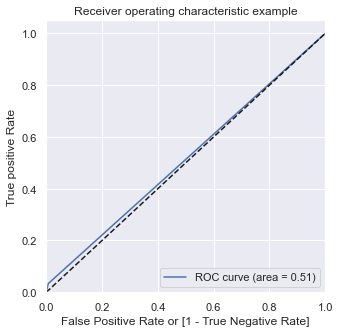

In [299]:
# Call the ROC function

draw_roc(y_train_pred_final.Loan_Status, y_train_pred_final.Predicted)

The area under the curve of the ROC is 0.51 which is not that good. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [308]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Loan_Status_Prob.map(lambda x: 1 if x > i else 0)


In [309]:
y_train_pred_final.head()

,Loan_Status,Loan_Status_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.122876,0,1,1,0,0,0,0,0,0,0,0
1,0,0.062072,0,1,0,0,0,0,0,0,0,0,0
2,0,0.150052,0,1,1,0,0,0,0,0,0,0,0
3,1,0.172402,0,1,1,0,0,0,0,0,0,0,0
4,0,0.165127,0,1,1,0,0,0,0,0,0,0,0


In [310]:
y_train_pred_final.shape

(276653, 13)

In [311]:
y_train_pred_final

,Loan_Status,Loan_Status_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.122876,0,1,1,0,0,0,0,0,0,0,0
1,0,0.062072,0,1,0,0,0,0,0,0,0,0,0
2,0,0.150052,0,1,1,0,0,0,0,0,0,0,0
3,1,0.172402,0,1,1,0,0,0,0,0,0,0,0
4,0,0.165127,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
276648,0,0.130348,0,1,1,0,0,0,0,0,0,0,0
276649,0,0.037739,0,1,0,0,0,0,0,0,0,0,0
276650,0,0.224816,0,1,1,1,0,0,0,0,0,0,0
276651,0,0.075943,0,1,0,0,0,0,0,0,0,0,0


In [316]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Loan_Status, y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] = [i,accuracy,sensi,speci]
print(cutoff_df)    

     prob  accuracy     sensi     speci
0.0   0.0  0.196000  1.000000  0.000000
0.1   0.1  0.390059  0.921308  0.260551
0.2   0.2  0.640214  0.657735  0.635942
0.3   0.3  0.761206  0.358476  0.859384
0.4   0.4  0.799615  0.145489  0.959079
0.5   0.5  0.804781  0.033454  0.992816
0.6   0.6  0.804126  0.001475  0.999798
0.7   0.7  0.804000  0.000000  1.000000
0.8   0.8  0.804000  0.000000  1.000000
0.9   0.9  0.804000  0.000000  1.000000


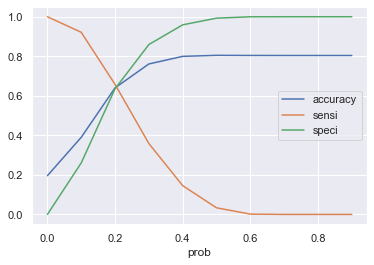

In [317]:
# Let's plot it as well

cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.20, you get the optimal values of the three metrics. So let's choose 0.2 as our cutoff now.

In [323]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Loan_Status_Prob.map(lambda x: 1 if x>0.2 else 0)
y_train_pred_final.head()

,Loan_Status,Loan_Status_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.122876,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.062072,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.150052,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.172402,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.165127,0,1,1,0,0,0,0,0,0,0,0,0


In [325]:
# Metrics have already been imported from sklearn for evaluation
# Let's evaluate the all metrics as well

print(f"Accuracy : {accuracy_score(y_train_pred_final.Loan_Status, y_train_pred_final.final_predicted )*100}%")
print(f"recall_score : {recall_score(y_train_pred_final.Loan_Status, y_train_pred_final.final_predicted )*100}%")
print(f"precision_score : {precision_score(y_train_pred_final.Loan_Status, y_train_pred_final.final_predicted )*100}%")
print(f"f1_score : {f1_score(y_train_pred_final.Loan_Status, y_train_pred_final.final_predicted )*100}%")
print(f"AUC score : {metrics.roc_auc_score(y_train_pred_final.Loan_Status, y_train_pred_final.final_predicted )*100}%")
print(f"confusion_matrix :")
print(confusion_matrix(y_train_pred_final.Loan_Status, y_train_pred_final.final_predicted ))

Accuracy : 64.02135527176644%
recall_score : 65.77345824727058%
precision_score : 30.576464738258945%
f1_score : 41.74616366041225%
AUC score : 64.6838419101874%
confusion_matrix :
[[141452  80977]
 [ 18559  35665]]


## Making Predictions on the Test Set:¶

In [326]:
X_train.columns

Index(['term', 'pub_rec', 'revol_bal', 'mort_acc', 'pub_rec_bankruptcies',
       'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3',
       'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5',
       'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_JOINT', 'purpose_small_business', 'OWN', 'RENT',
       'Average Loan', 'Very Low', 'Average'],
      dtype='object')

In [327]:
X_test.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2',
       'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4',
       'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1',
       'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
       '11650', '22690', '29597', '30723', '48052', '7046

In [328]:
set(X_test.columns) - set(X_train.columns)

{'05113',
 '11650',
 '22690',
 '29597',
 '30723',
 '48052',
 '70466',
 '86630',
 '93700',
 'Better off',
 'High Loan',
 'Low',
 'Lower Loan',
 'OTHER',
 'annual_inc',
 'application_type_INDIVIDUAL',
 'dti',
 'earliest_cr_year',
 'initial_list_status_w',
 'installment',
 'int_rate',
 'loan_amnt',
 'open_acc',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_house',
 'purpose_major_purchase',
 'purpose_medical',
 'purpose_moving',
 'purpose_other',
 'purpose_renewable_energy',
 'purpose_vacation',
 'purpose_wedding',
 'revol_util',
 'total_acc'}

In [329]:
X_test.drop(['05113',
 '11650',
 '22690',
 '29597',
 '30723',
 '48052',
 '70466',
 '86630',
 '93700',
 'Better off',
 'High Loan',
 'Low',
 'Lower Loan',
 'OTHER',
 'annual_inc',
 'application_type_INDIVIDUAL',
 'dti',
 'earliest_cr_year',
 'initial_list_status_w',
 'installment',
 'int_rate',
 'loan_amnt',
 'open_acc',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_house',
 'purpose_major_purchase',
 'purpose_medical',
 'purpose_moving',
 'purpose_other',
 'purpose_renewable_energy',
 'purpose_vacation',
 'purpose_wedding',
 'revol_util',
 'total_acc'], axis = 1, inplace = True)

In [331]:
col = X_test.columns
col

Index(['term', 'pub_rec', 'revol_bal', 'mort_acc', 'pub_rec_bankruptcies',
       'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3',
       'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5',
       'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_JOINT', 'purpose_small_business', 'OWN', 'RENT',
       'Average Loan', 'Very Low', 'Average'],
      dtype='object')

In [333]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [334]:
# Check X_test_sm

X_test_sm

,const,term,pub_rec,revol_bal,mort_acc,pub_rec_bankruptcies,A2,A3,A4,A5,...,G5,verification_status_Source Verified,verification_status_Verified,application_type_JOINT,purpose_small_business,OWN,RENT,Average Loan,Very Low,Average
346397,1.0,0,0,24499.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
78418,1.0,0,1,8381.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
356956,1.0,0,0,7721.0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
327009,1.0,0,0,44810.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
124321,1.0,0,0,4901.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139477,1.0,0,0,10425.0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
371079,1.0,0,0,2298.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
303152,1.0,0,0,8966.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108628,1.0,0,0,51680.0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,1


In [336]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [337]:
y_test_pred

346397    0.237028
78418     0.220752
356956    0.219782
327009    0.084303
124321    0.211256
            ...   
139477    0.073572
371079    0.106254
303152    0.073092
108628    0.127259
129767    0.227398
Length: 118566, dtype: float64

In [339]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1

,0
346397,0.237028
78418,0.220752
356956,0.219782
327009,0.084303
124321,0.211256
...,...
139477,0.073572
371079,0.106254
303152,0.073092
108628,0.127259


In [341]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)


In [342]:
y_test_df

,loan_status
346397,0
78418,0
356956,0
327009,0
124321,0
...,...
139477,0
371079,0
303152,0
108628,0


In [343]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [345]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [346]:
# Check 'y_pred_final'

y_pred_final.head()

,loan_status,0
0,0,0.237028
1,0,0.220752
2,0,0.219782
3,0,0.084303
4,0,0.211256


In [349]:
# Rename the column

y_pred_final = y_pred_final.rename(columns={0: 'Loan_Status_Prob'})

In [350]:
# Let's see the head of y_pred_final

y_pred_final.head()

,loan_status,Loan_Status_Prob
0,0,0.237028
1,0,0.220752
2,0,0.219782
3,0,0.084303
4,0,0.211256


In [354]:
# Make predictions on the test set using 0.2 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Loan_Status_Prob.map(lambda x:1 if x>0.2 else 0)

In [355]:
# Check y_pred_final

y_pred_final.head()

,loan_status,Loan_Status_Prob,final_predicted
0,0,0.237028,1
1,0,0.220752,1
2,0,0.219782,1
3,0,0.084303,0
4,0,0.211256,1


In [356]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['loan_status'], y_pred_final.final_predicted)

0.6393654167299225

In [361]:
# Metrics have already been imported from sklearn for evaluation
# Let's evaluate the all metrics as well

print(f"Accuracy : {accuracy_score(y_pred_final.loan_status, y_pred_final.final_predicted )*100}%")
print(f"recall_score : {recall_score(y_pred_final.loan_status, y_pred_final.final_predicted )*100}%")
print(f"precision_score : {precision_score(y_pred_final.loan_status, y_pred_final.final_predicted )*100}%")
print(f"f1_score : {f1_score(y_pred_final.loan_status, y_pred_final.final_predicted )*100}%")
print(f"AUC score : {metrics.roc_auc_score(y_pred_final.loan_status, y_pred_final.final_predicted )*100}%")
print(f"confusion_matrix :")
print(confusion_matrix(y_pred_final.loan_status, y_pred_final.final_predicted ))

Accuracy : 63.936541672992256%
recall_score : 66.5908408086184%
precision_score : 30.728857199445436%
f1_score : 42.0523384244264%
AUC score : 64.93911654253125%
confusion_matrix :
[[60292 34975]
 [ 7784 15515]]


In [366]:
# Checking the classification_report

print(f"{classification_report(y_pred_final['loan_status'], y_pred_final.final_predicted)}")

              precision    recall  f1-score   support

           0       0.89      0.63      0.74     95267
           1       0.31      0.67      0.42     23299

    accuracy                           0.64    118566
   macro avg       0.60      0.65      0.58    118566
weighted avg       0.77      0.64      0.68    118566



# Inferences from Model 4:

- **Defaulters/Irresponsible Business or Customers:** For our model 3 , we are getting fi-score as **42 %** to check if the credit line can be extended to the business/customers who have a **higher chances of defaulting/ not repaying** the loan/credit taken. Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.

- **Honest/Responsible Business or Customers :** For our model 2 ( with balancing weights) , we are getting fi-score as **74 %** to check if the credit line can be extended to the business/customers who have a **higher chances of fully repaying the loan/credit taken.** This is important as we can lose out on an opportunity to finance more supply chains and earn interest in it.

- We can conclude from the above metrics and f1-score that the Model 4 is the worst performer amongst all the 4 models in terms of Precision and Recal but it's **have a best Recall score of 67 %.**

- In my analysis, over-sampling does not have any significant affect on model's performance. 

# Recommendations:

- As the NPA issues are rising for the Lending Clubs/Banks, it's necessary to think in terms of not loosing money in bad loans, Recall is the parameter which should be more focused. The term amount, purpose for the loan take ( if it's small business then there's higher possibility of defaulting ). Apart from that, if there are derogatory public records in form of earlier Lending Clubs/Banksruptcies, then alos, the Lending Clubs/Banks should focus on not giving any loan to such customers/business.

- In addition to this, the Lending Clubs/Banks assigned subgrades are also equally important as if the sub grades are of low gradings ( F and G ) to be specific, then there's almost 50 % probability of the customers defaulting on the loan taken. The Lending Clubs/Banks should be careful in this perspective as well.

- Also if we think in terms of underwriting process behind Supply Chain Financing, in my analysis, I found that the if the income source is not verified by Lending Clubs/Banks, then it's a possibility of higher default as it's a key parameter after VIF and RFE (Recurrsive Feature Elimaination) considerations. In addition if the income of the borrower is very low the Lending Clubs/Banks should rethink twice before disbursind the loan amount.

# Tradeoff Questions:

*How can we make sure that our model can detect real defaulters and there are fewer false positives?*

    - As we have seen in our first two models, by keeping precion score higher and then assigning priority to fi score and then recall, we can make sure that real dafualters ( TP ) and low False positives ( FP ) in demominator of Precision. This is important as we can lose out on an opportunity to finance more supply chains and earn interest in it.

    - Also, we have to handle treat missing values and outliers after train test split. Missing values can be treated on all three types of data (train, cv and test but outliers needs to get handled only on train data).

    - Even, proper balancing of class weights and findling best hyperparameter can be though as one of the key consideration. 

*Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.*

    - We should be having a low recall rate 
    - Then the priority should be considering less gap between precison and recall and having a more AUC (area under the curve score)
    
   

# Questionnaire Answers:

- *What percentage of customers have fully paid their Loan Amount?*
    
    - 80 % of the customers have fully paid their Loan Amount.


- *Comment about the correlation between Loan Amount and Installment features.*
    - loan_amnt and installment are highly correlated which means , more the number of loan amount, more are the installments.
    - When the loan taken is less than 20000, then the installments in form of the monthly payment owed by the borrower if the loan originates, are similar to both types of borrowers who have defaulted and who had fully paid the loan.
    -  But as loan amount increases, the installments owed by the defaulters decreases as compared to the installments by the honest borrowers who are not defaulting.


- *The majority of people have home ownership as ___.*
    - The majority of people have home ownership as **MORTGAGE** 


- *People with grades ‘A’ are more likely to fully pay their loan. (T/F)*
    - True


- *Name the top 2 afforded job titles.*
    - 2 afforded job titles - Teacher and Manager


- *Thinking from a Lending Clubs/Banks's perspective, which metric should our primary focus be on(ROC AUC, Precision, Recall, F1 Score)*
    
    - If thinking purely in terms of not loosing money in bad loans, Recall is the parameter which should be more focused. In Model 4, I am getting recall as 66 % which is comparatively higher than any of the other three Models. 
    
    - If we think in terms of not loosing customers at the cost of loosing some money in bad loans, Precision should be the main parameter that we should focus. Our three models ( 1,2,3), Model 3 to be specific has highest precision percentage i.e nearly equal to 100 %
    
    - But we have to provide a balanced stance, then F1 score is the metric as it considers both Precision and Recall (harmonically). Model 2 has the highest F1 core in my analysis.
    
    - In order to conclude, since Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone. And hence Model 4 is the best model which is having **highest Recall percentage.**


- *How does the gap in precision and recall affect the Lending Clubs/Banks?*
- The gap in precision and recall affects the Lending Clubs/Banks in terms if more difference in precision and recall, more are the chances of Lending Clubs/Banks loosing money in form of bad loans. As per my analysis in Model 4 we are getting less precision core then the recall score and the difference is of 15. Whereas in all other models the difference between Precision and Recall is around 50 % ( Precision being the highest and recall being in range of 40-50 %. This clearly shows that there's a risk of Lending Clubs/Banks giving bad loans to defaulters and thus the NPA of the Lending Clubs/Banks are currently rising.


- *Which were the features that heavily affected the outcome?*
    - According to my analysis, Term (36 or 60 months) , Subgrades ( A, B ,F5 and G)  application_type_JOINT,Number of mortage accounts ( Mort_acc) and any of the two - number of public record Lending Clubs/Banksruptcy (pub_rec_bankruptcies) or Number of derogatory public records (pub_rec) .
    - These are the top 5 features which are heavily affecting the outcome and are primarily important.


- *Will the results be affected by geographical location? (Yes/No)*
    - Yes, there are few Geographical locations based on zip codes where the charged off rates are 100 % . Hence the results are affected by geographical location


